In [1]:
# Vamos a clasificar localizaciones del excel '20210916_geo_Megumi(190229).xlsx'

In [2]:
"""
De acuerdo a reu con andres:
1-vamos a clasificar movimientos por localizaciones
2-nos quedamos con las 5 1as localizaciones q mas transacciones tengan
3-para cada localizacion nos quedamos con los meses que mas transacciones tengan (si son transacciones q aparecen
en mas de 6 meses consideramos q ése es su domicilio habitual)
4-para cada localizacion y meses q mas transacciones tengan hacemos la suma de las transacciones para esos meses
y localizaciones y tambien decimos las 5 categorias en las q mas gastan
"""

'\nDe acuerdo a reu con andres:\n1-vamos a clasificar movimientos por localizaciones\n2-nos quedamos con las 5 1as localizaciones q mas transacciones tengan\n3-para cada localizacion nos quedamos con los meses que mas transacciones tengan (si son transacciones q aparecen\nen mas de 6 meses consideramos q ése es su domicilio habitual)\n4-para cada localizacion y meses q mas transacciones tengan hacemos la suma de las transacciones para esos meses\ny localizaciones y tambien decimos las 5 categorias en las q mas gastan\n'

In [3]:
import pandas
from pandas import read_excel, date_range, DataFrame, concat, to_datetime
import numpy

from matplotlib import pyplot
import statistics
from pandas.plotting import lag_plot, autocorrelation_plot
from prophet import Prophet

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

pandas.set_option('display.max_rows', 10)

In [4]:
# Load data using read_excel
transacciones_df = read_excel('20210916_geo_Megumi(190229).xlsx', sheet_name='20210916Megumi(190229)')
transacciones_df

,Fecha transacción,Importe,ID Categoría,Nombre categoría,Nivel categoría,iD categoría padre,Nombre categoría padre,Proveedor,Latitud,Longitud,CP,Ciudad,Pais,Marca,Sector,Financiero,Transferencia
0,2021-09-07,-14.50,222.0,category.adsl_222,3.0,521.0,"""Comunicaciones y TV""",NaN,NaN,NaN,NaN,NaN,España,Pepephone,NaN,False,False
1,2021-09-07,-18.98,214.0,category.agua_214,2.0,2.0,category.vivienda_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
2,2021-09-07,-22.58,216.0,category.electricidad_216,3.0,520.0,Energía,NaN,NaN,NaN,NaN,NaN,España,HolaLuz.com,NaN,False,False
3,2021-09-07,-5.62,219.0,category.gas_natural_219,3.0,520.0,Energía,NaN,NaN,NaN,NaN,NaN,España,HolaLuz.com,NaN,False,False
4,2021-09-07,-61.68,214.0,category.agua_214,2.0,2.0,category.vivienda_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019-04-30,-117.73,70.0,category.supermercados_70,2.0,4.0,category.alimentacion_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
996,2019-04-30,879.62,576.0,Nómina,2.0,1.0,category.ingresos_1,NaN,NaN,NaN,NaN,NaN,NaN,"""Spain-Japan Market""",NaN,False,False
997,2019-04-22,-67.80,444.0,category.alimentacion_restauracion_444,3.0,118.0,category.viajes_118,NaN,NaN,NaN,NaN,NaN,NaN,"""O Lar Do Leitón""",NaN,False,False
998,2019-04-22,-2.50,444.0,category.alimentacion_restauracion_444,3.0,118.0,category.viajes_118,NaN,NaN,NaN,NaN,NaN,NaN,"""Bico de Xeado""",NaN,False,False


In [5]:
# vamos a quedarnos con las columnas de las transacciones q nos importan incluyendo la localizacion

# Fecha transacción
# Importe
# ID Categoría
# Nombre categoría
# Latitud
# Longitud
# CP
# Ciudad
# Pais

In [6]:
statistics_df = transacciones_df.iloc[:, 0:13]
statistics_df

,Fecha transacción,Importe,ID Categoría,Nombre categoría,Nivel categoría,iD categoría padre,Nombre categoría padre,Proveedor,Latitud,Longitud,CP,Ciudad,Pais
0,2021-09-07,-14.50,222.0,category.adsl_222,3.0,521.0,"""Comunicaciones y TV""",NaN,NaN,NaN,NaN,NaN,España
1,2021-09-07,-18.98,214.0,category.agua_214,2.0,2.0,category.vivienda_2,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-07,-22.58,216.0,category.electricidad_216,3.0,520.0,Energía,NaN,NaN,NaN,NaN,NaN,España
3,2021-09-07,-5.62,219.0,category.gas_natural_219,3.0,520.0,Energía,NaN,NaN,NaN,NaN,NaN,España
4,2021-09-07,-61.68,214.0,category.agua_214,2.0,2.0,category.vivienda_2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019-04-30,-117.73,70.0,category.supermercados_70,2.0,4.0,category.alimentacion_4,NaN,NaN,NaN,NaN,NaN,NaN
996,2019-04-30,879.62,576.0,Nómina,2.0,1.0,category.ingresos_1,NaN,NaN,NaN,NaN,NaN,NaN
997,2019-04-22,-67.80,444.0,category.alimentacion_restauracion_444,3.0,118.0,category.viajes_118,NaN,NaN,NaN,NaN,NaN,NaN
998,2019-04-22,-2.50,444.0,category.alimentacion_restauracion_444,3.0,118.0,category.viajes_118,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# seguimos quitando columnas que no nos interesan
statistics_df.drop(columns=["Nivel categoría", "iD categoría padre", "Nombre categoría padre", 
                            "Proveedor"], inplace=True)
statistics_df

,Fecha transacción,Importe,ID Categoría,Nombre categoría,Latitud,Longitud,CP,Ciudad,Pais
0,2021-09-07,-14.50,222.0,category.adsl_222,NaN,NaN,NaN,NaN,España
1,2021-09-07,-18.98,214.0,category.agua_214,NaN,NaN,NaN,NaN,NaN
2,2021-09-07,-22.58,216.0,category.electricidad_216,NaN,NaN,NaN,NaN,España
3,2021-09-07,-5.62,219.0,category.gas_natural_219,NaN,NaN,NaN,NaN,España
4,2021-09-07,-61.68,214.0,category.agua_214,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,2019-04-30,-117.73,70.0,category.supermercados_70,NaN,NaN,NaN,NaN,NaN
996,2019-04-30,879.62,576.0,Nómina,NaN,NaN,NaN,NaN,NaN
997,2019-04-22,-67.80,444.0,category.alimentacion_restauracion_444,NaN,NaN,NaN,NaN,NaN
998,2019-04-22,-2.50,444.0,category.alimentacion_restauracion_444,NaN,NaN,NaN,NaN,NaN


In [8]:
# renombramos columnas
statistics_df.rename(columns={'Fecha transacción':"DATE",
                              'Importe':"AMOUNT",
                              'ID Categoría':"ID_CAT",
                              'Nombre categoría':"NAME_CAT",
                              'Latitud':"LAT",
                              'Longitud':"LON",
                              'CP':"PC",
                              'Ciudad':"CITY",
                              'Pais':"COUNTRY"},                     
                     inplace=True)
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY
0,2021-09-07,-14.50,222.0,category.adsl_222,NaN,NaN,NaN,NaN,España
1,2021-09-07,-18.98,214.0,category.agua_214,NaN,NaN,NaN,NaN,NaN
2,2021-09-07,-22.58,216.0,category.electricidad_216,NaN,NaN,NaN,NaN,España
3,2021-09-07,-5.62,219.0,category.gas_natural_219,NaN,NaN,NaN,NaN,España
4,2021-09-07,-61.68,214.0,category.agua_214,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,2019-04-30,-117.73,70.0,category.supermercados_70,NaN,NaN,NaN,NaN,NaN
996,2019-04-30,879.62,576.0,Nómina,NaN,NaN,NaN,NaN,NaN
997,2019-04-22,-67.80,444.0,category.alimentacion_restauracion_444,NaN,NaN,NaN,NaN,NaN
998,2019-04-22,-2.50,444.0,category.alimentacion_restauracion_444,NaN,NaN,NaN,NaN,NaN


In [9]:
# de las 1000 observaciones vemos cuantos valores nulos hay en cada columna 
statistics_df.isna().sum()

DATE          0
AMOUNT        0
ID_CAT       30
NAME_CAT     30
LAT         863
LON         863
PC          858
CITY        885
COUNTRY     366
dtype: int64

In [10]:
statistics_df.dtypes

DATE         object
AMOUNT      float64
ID_CAT      float64
NAME_CAT     object
LAT         float64
LON         float64
PC           object
CITY         object
COUNTRY      object
dtype: object

In [11]:
pandas.set_option('display.max_rows', 1000)

In [12]:
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY
0,2021-09-07,-14.50,222.0,category.adsl_222,NaN,NaN,NaN,NaN,España
1,2021-09-07,-18.98,214.0,category.agua_214,NaN,NaN,NaN,NaN,NaN
2,2021-09-07,-22.58,216.0,category.electricidad_216,NaN,NaN,NaN,NaN,España
3,2021-09-07,-5.62,219.0,category.gas_natural_219,NaN,NaN,NaN,NaN,España
4,2021-09-07,-61.68,214.0,category.agua_214,NaN,NaN,NaN,NaN,NaN
5,2021-09-07,5.78,446.0,category.taxis_transporte_publico_446,NaN,NaN,NaN,NaN,NaN
6,2021-09-07,11.00,445.0,category.museus_excursiones_445,NaN,NaN,NaN,NaN,España
7,2021-09-07,29.04,443.0,category.hotel_alojamiento_443,NaN,NaN,NaN,NaN,NaN
8,2021-09-07,-57.36,444.0,category.alimentacion_restauracion_444,NaN,NaN,NaN,NaN,NaN
9,2021-09-07,14.00,440.0,category.tren_440,NaN,NaN,NaN,NaN,España


In [13]:
pandas.set_option('display.max_rows', 10)

In [14]:
# afortunadamente los datos están bastante bien en cuanto a tipologia y son todos posteriores al 2019

In [15]:
# cambio el tipo de la columna DATE a formato datetime
statistics_df['DATE'] = pandas.to_datetime(statistics_df['DATE'])
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY
0,2021-09-07,-14.50,222.0,category.adsl_222,NaN,NaN,NaN,NaN,España
1,2021-09-07,-18.98,214.0,category.agua_214,NaN,NaN,NaN,NaN,NaN
2,2021-09-07,-22.58,216.0,category.electricidad_216,NaN,NaN,NaN,NaN,España
3,2021-09-07,-5.62,219.0,category.gas_natural_219,NaN,NaN,NaN,NaN,España
4,2021-09-07,-61.68,214.0,category.agua_214,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,2019-04-30,-117.73,70.0,category.supermercados_70,NaN,NaN,NaN,NaN,NaN
996,2019-04-30,879.62,576.0,Nómina,NaN,NaN,NaN,NaN,NaN
997,2019-04-22,-67.80,444.0,category.alimentacion_restauracion_444,NaN,NaN,NaN,NaN,NaN
998,2019-04-22,-2.50,444.0,category.alimentacion_restauracion_444,NaN,NaN,NaN,NaN,NaN


In [16]:
statistics_df.dtypes

DATE        datetime64[ns]
AMOUNT             float64
ID_CAT             float64
NAME_CAT            object
LAT                float64
LON                float64
PC                  object
CITY                object
COUNTRY             object
dtype: object

In [17]:
# examino cuantos valores distintos hay para PC
statistics_df.PC.unique()

array([nan, 28028, 28002, 28016, 28004, 28009, 28109, 28014, 28042,
       '" 28016"', 28840, 28011, 8029, 7620, 28012, 8035, 8024, 28008,
       8007, 8013, 28700, 28015, 28020, 28001, 28003], dtype=object)

In [18]:
statistics_df.loc[400,'PC']

'" 28016"'

In [19]:
type(statistics_df.loc[400,'PC'])

str

In [20]:
# reemplazo el valor de la celda de ese dataframe por un valor equivalente que pueda pasarse a numerico
statistics_df.loc[400,'PC'] = 28016

In [21]:
# examino cuantos valores distintos hay para PC
statistics_df.PC.unique()

array([nan, 28028, 28002, 28016, 28004, 28009, 28109, 28014, 28042, 28840,
       28011, 8029, 7620, 28012, 8035, 8024, 28008, 8007, 8013, 28700,
       28015, 28020, 28001, 28003], dtype=object)

In [22]:
# convertimos la columna PC a float o mejor int si se puede
statistics_df['PC'] = pandas.to_numeric(statistics_df['PC'], downcast='integer')
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY
0,2021-09-07,-14.50,222.0,category.adsl_222,NaN,NaN,NaN,NaN,España
1,2021-09-07,-18.98,214.0,category.agua_214,NaN,NaN,NaN,NaN,NaN
2,2021-09-07,-22.58,216.0,category.electricidad_216,NaN,NaN,NaN,NaN,España
3,2021-09-07,-5.62,219.0,category.gas_natural_219,NaN,NaN,NaN,NaN,España
4,2021-09-07,-61.68,214.0,category.agua_214,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,2019-04-30,-117.73,70.0,category.supermercados_70,NaN,NaN,NaN,NaN,NaN
996,2019-04-30,879.62,576.0,Nómina,NaN,NaN,NaN,NaN,NaN
997,2019-04-22,-67.80,444.0,category.alimentacion_restauracion_444,NaN,NaN,NaN,NaN,NaN
998,2019-04-22,-2.50,444.0,category.alimentacion_restauracion_444,NaN,NaN,NaN,NaN,NaN


In [23]:
statistics_df.dtypes

DATE        datetime64[ns]
AMOUNT             float64
ID_CAT             float64
NAME_CAT            object
LAT                float64
LON                float64
PC                 float64
CITY                object
COUNTRY             object
dtype: object

In [24]:
statistics_df.PC.unique()

array([   nan, 28028., 28002., 28016., 28004., 28009., 28109., 28014.,
       28042., 28840., 28011.,  8029.,  7620., 28012.,  8035.,  8024.,
       28008.,  8007.,  8013., 28700., 28015., 28020., 28001., 28003.])

In [25]:
# de las 1000 observaciones vemos cuantos valores nulos hay en cada columna 
statistics_df.isna().sum()

DATE          0
AMOUNT        0
ID_CAT       30
NAME_CAT     30
LAT         863
LON         863
PC          858
CITY        885
COUNTRY     366
dtype: int64

In [26]:
# seleccionamos las filas que tienen NaN en ID_CAT
pandas.set_option('display.max_rows', 1000)
statistics_df[statistics_df['ID_CAT'].isnull()]

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY
11,2021-09-07,50.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,2021-08-02,-39.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,2021-07-13,-48.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,2021-07-04,-32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,2021-05-03,-49.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,2021-05-03,-35.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,2021-04-02,-59.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,2021-03-09,75.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,2021-03-02,-72.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,2021-03-02,-71.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
pandas.set_option('display.max_rows', 10)

In [28]:
# vemos que en las filas donde ID_CAT en NaN, NAME_CAT también lo es.
# como esto no nos aporta información a nuestro estudio las vamos a eliminar.
# o, mejor dicho, nos quedamos con las filas donde ID_CAT es notna
statistics_df = statistics_df[statistics_df['ID_CAT'].notna()]
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY
0,2021-09-07,-14.50,222.0,category.adsl_222,NaN,NaN,NaN,NaN,España
1,2021-09-07,-18.98,214.0,category.agua_214,NaN,NaN,NaN,NaN,NaN
2,2021-09-07,-22.58,216.0,category.electricidad_216,NaN,NaN,NaN,NaN,España
3,2021-09-07,-5.62,219.0,category.gas_natural_219,NaN,NaN,NaN,NaN,España
4,2021-09-07,-61.68,214.0,category.agua_214,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,2019-04-30,-117.73,70.0,category.supermercados_70,NaN,NaN,NaN,NaN,NaN
996,2019-04-30,879.62,576.0,Nómina,NaN,NaN,NaN,NaN,NaN
997,2019-04-22,-67.80,444.0,category.alimentacion_restauracion_444,NaN,NaN,NaN,NaN,NaN
998,2019-04-22,-2.50,444.0,category.alimentacion_restauracion_444,NaN,NaN,NaN,NaN,NaN


In [29]:
# chequeamos que hemos eliminado las filas que tienen NaN en ID_CAT
statistics_df[statistics_df['ID_CAT'].isnull()]

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY


In [30]:
# de las 970 observaciones vemos ahora cuantos valores nulos hay en cada columna 
statistics_df.isna().sum()

DATE          0
AMOUNT        0
ID_CAT        0
NAME_CAT      0
LAT         833
LON         833
PC          828
CITY        855
COUNTRY     338
dtype: int64

In [31]:
# veo el porcentaje de valores null por columna
statistics_df.isna().sum()/len(statistics_df.index)*100

DATE         0.000000
AMOUNT       0.000000
ID_CAT       0.000000
NAME_CAT     0.000000
LAT         85.876289
LON         85.876289
PC          85.360825
CITY        88.144330
COUNTRY     34.845361
dtype: float64

In [32]:
"""
Vemos que el menor porcentaje de nulos esta en COUNTRY.
Vemos que LON, LAT, y PC tiene un porcentaje similar de nulos del 85%.
Vemos que CITY tiene un % de nulos un poquito mayor con 88%.
"""

'\nVemos que el menor porcentaje de nulos esta en COUNTRY.\nVemos que LON, LAT, y PC tiene un porcentaje similar de nulos del 85%.\nVemos que CITY tiene un % de nulos un poquito mayor con 88%.\n'

<AxesSubplot:xlabel='index'>

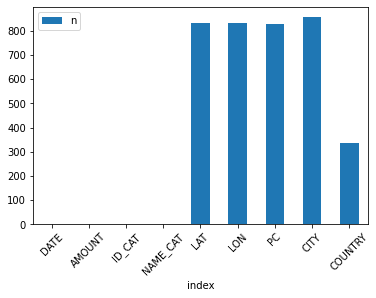

In [33]:
# pinto en un grafico de barras el numero de valores null por columna
statistics_df.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [34]:
# Vamos a ver cuantos valores distintos hay de COUNTRY
statistics_df.COUNTRY.unique()

array(['España', nan, 'Global', 'Perú', '"Estados Unidos"', 'Alemania',
       'Chile'], dtype=object)

In [35]:
# cuento la cantidad de observaciones que hay por cada localizacion
statistics_df.groupby('COUNTRY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY
COUNTRY,,,,,,,,
"""Estados Unidos""",1,1,1,1,0,0,0,0
Alemania,3,3,3,3,0,0,0,0
Chile,1,1,1,1,0,0,0,0
España,397,397,397,397,66,66,71,56
Global,220,220,220,220,64,64,64,52
Perú,10,10,10,10,0,0,0,0


In [36]:
# vamos a ver las filas 'Global' a ver que otra localizacion tienen
pandas.set_option('display.max_rows', 1000)
statistics_df.loc[statistics_df['COUNTRY'] == 'Global']

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY
10,2021-09-07,48.00,441.0,category.avion_441,NaN,NaN,NaN,NaN,Global
20,2021-08-24,-2.34,113.0,"""Otros gastos personales""",NaN,NaN,NaN,NaN,Global
22,2021-08-20,-12.49,109.0,category.ropa_complementos_109,NaN,NaN,NaN,NaN,Global
26,2021-08-17,-7.00,421.0,category.adquisicion_421,NaN,NaN,NaN,NaN,Global
29,2021-08-09,-6.63,70.0,category.supermercados_70,40.438456,-3.672990,28028.0,NaN,Global
42,2021-07-30,-25.50,70.0,category.supermercados_70,40.441047,-3.678367,28002.0,Madrid,Global
48,2021-07-28,32.30,502.0,category.desayunos_menus_502,NaN,NaN,NaN,NaN,Global
49,2021-07-24,7.50,499.0,category.taxi_499,NaN,NaN,NaN,NaN,Global
50,2021-07-22,-5.95,502.0,category.desayunos_menus_502,40.441047,-3.678367,28002.0,Madrid,Global
51,2021-07-21,-24.40,502.0,category.desayunos_menus_502,NaN,NaN,NaN,NaN,Global


In [37]:
# 'Global' se refiere a proveedores de servicios con cobertura nacional completa: iberdrola, endesa, masmovil.
# Vamos a sustituir su valor por 'España' que es la localizacion mayoritaria del dataset
statistics_df.loc[statistics_df['COUNTRY'] == 'Global', 'COUNTRY'] = 'España'

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [38]:
# vamos ahora a ver las filas 'Global' a ver que otra localizacion tienen
statistics_df.loc[statistics_df['COUNTRY'] == 'Global']

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY


In [39]:
# cuento la cantidad de observaciones que hay por cada localizacion
statistics_df.groupby('COUNTRY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY
COUNTRY,,,,,,,,
"""Estados Unidos""",1,1,1,1,0,0,0,0
Alemania,3,3,3,3,0,0,0,0
Chile,1,1,1,1,0,0,0,0
España,617,617,617,617,130,130,135,108
Perú,10,10,10,10,0,0,0,0


In [40]:
# quito las comillas a "Estados Unidos" (primero averiguo el indice)
statistics_df.loc[statistics_df['COUNTRY'] == '"Estados Unidos"']

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY
279,2021-01-03,-9.0,117.0,category.regalos_celebraciones_117,NaN,NaN,NaN,NaN,"""Estados Unidos"""


In [41]:
# actualizo el valor
statistics_df.loc[279,'COUNTRY'] = 'Estados Unidos'

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [42]:
# cuento ahora la cantidad de observaciones que hay por cada COUNTRY
statistics_df.groupby('COUNTRY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY
COUNTRY,,,,,,,,
Alemania,3,3,3,3,0,0,0,0
Chile,1,1,1,1,0,0,0,0
España,617,617,617,617,130,130,135,108
Estados Unidos,1,1,1,1,0,0,0,0
Perú,10,10,10,10,0,0,0,0


In [43]:
# Vemos que para COUNTRY != España no hay info de LAT, LON, PC, CITY

In [44]:
# vamos a ver ahora cuantos valores distintos hay de CITY
statistics_df.CITY.unique()

array([nan, 'Madrid', 'Alcobendas', 'Barcelona', 'Llucmajor',
       '"San Sebastián de los Reyes"'], dtype=object)

In [45]:
# cuento la cantidad de observaciones que hay por cada CITY
statistics_df.groupby('CITY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,COUNTRY
CITY,,,,,,,,
"""San Sebastián de los Reyes""",1,1,1,1,1,1,1,1
Alcobendas,1,1,1,1,1,1,1,0
Barcelona,6,6,6,6,6,6,6,4
Llucmajor,5,5,5,5,0,0,5,5
Madrid,102,102,102,102,93,93,93,98


In [46]:
# cambiamos ''"San Sebastian de los Reyes"'' por 'San Sebastian de los Reyes' (1o averiguo el indice)
statistics_df.loc[statistics_df['CITY'] == '"San Sebastián de los Reyes"']

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY
811,2019-09-23,-60.0,50.0,category.mobiliario_decoracion_50,40.54592,-3.612036,28700.0,"""San Sebastián de los Reyes""",España


In [47]:
# actualizo el valor
statistics_df.loc[811,'CITY'] = 'San Sebastián de los Reyes'

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [48]:
# cuento ahora la cantidad de observaciones que hay por cada CITY
statistics_df.groupby('CITY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,COUNTRY
CITY,,,,,,,,
Alcobendas,1,1,1,1,1,1,1,0
Barcelona,6,6,6,6,6,6,6,4
Llucmajor,5,5,5,5,0,0,5,5
Madrid,102,102,102,102,93,93,93,98
San Sebastián de los Reyes,1,1,1,1,1,1,1,1


In [49]:
# a la fila de CITY 'Alcobendas' le vamos a poner el COUNTRY 'España'
statistics_df.loc[statistics_df['CITY'] == 'Alcobendas']

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY
264,2021-01-13,-22.3,117.0,category.regalos_celebraciones_117,40.508184,-3.644975,28109.0,Alcobendas,NaN


In [50]:
# actualizo el valor
statistics_df.loc[264,'COUNTRY'] = 'España'

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [51]:
# veo si lo he cambiado bien
statistics_df.loc[statistics_df['CITY'] == 'Alcobendas']

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY
264,2021-01-13,-22.3,117.0,category.regalos_celebraciones_117,40.508184,-3.644975,28109.0,Alcobendas,España


In [52]:
# cuento otra vez la cantidad de observaciones que hay por cada CITY
statistics_df.groupby('CITY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,COUNTRY
CITY,,,,,,,,
Alcobendas,1,1,1,1,1,1,1,1
Barcelona,6,6,6,6,6,6,6,4
Llucmajor,5,5,5,5,0,0,5,5
Madrid,102,102,102,102,93,93,93,98
San Sebastián de los Reyes,1,1,1,1,1,1,1,1


In [53]:
# en la tabla anterior vemos que todas las observaciones que tienen LAT y LON también tiene CITY
# vamos a mostrar ahora las filas donde LAT y LON es distinto de na para ver si tienen CITY y COUNTRY y PC
# asignado y las podemos borrar.
statistics_df[~statistics_df['LAT'].isnull()]

,DATE,AMOUNT,ID_CAT,NAME_CAT,LAT,LON,PC,CITY,COUNTRY
29,2021-08-09,-6.63,70.0,category.supermercados_70,40.438456,-3.672990,28028.0,NaN,España
42,2021-07-30,-25.50,70.0,category.supermercados_70,40.441047,-3.678367,28002.0,Madrid,España
50,2021-07-22,-5.95,502.0,category.desayunos_menus_502,40.441047,-3.678367,28002.0,Madrid,España
71,2021-07-08,-10.58,70.0,category.supermercados_70,40.444092,-3.675320,28002.0,Madrid,España
152,2021-05-04,-4.95,502.0,category.desayunos_menus_502,40.441047,-3.678367,28002.0,Madrid,España
172,2021-04-24,-2.99,70.0,category.supermercados_70,40.444092,-3.675320,28002.0,Madrid,España
182,2021-04-09,-23.92,70.0,category.supermercados_70,40.457353,-3.678047,28016.0,Madrid,España
207,2021-03-20,-9.45,502.0,category.desayunos_menus_502,40.424038,-3.698603,28004.0,Madrid,España
211,2021-03-15,-21.56,502.0,category.desayunos_menus_502,40.448557,-3.668990,28002.0,NaN,España
235,2021-02-27,-9.21,70.0,category.supermercados_70,40.444092,-3.675320,28002.0,Madrid,España


In [54]:
# veo q todas las filas con LAT y LON notnull también tienen PC así que puedo hacer drop de LAT y LON
statistics_df.drop(columns=['LAT','LON'], inplace=True)
pandas.set_option('display.max_rows', 10)
statistics_df

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,DATE,AMOUNT,ID_CAT,NAME_CAT,PC,CITY,COUNTRY
0,2021-09-07,-14.50,222.0,category.adsl_222,NaN,NaN,España
1,2021-09-07,-18.98,214.0,category.agua_214,NaN,NaN,NaN
2,2021-09-07,-22.58,216.0,category.electricidad_216,NaN,NaN,España
3,2021-09-07,-5.62,219.0,category.gas_natural_219,NaN,NaN,España
4,2021-09-07,-61.68,214.0,category.agua_214,NaN,NaN,NaN
...,...,...,...,...,...,...,...
995,2019-04-30,-117.73,70.0,category.supermercados_70,NaN,NaN,NaN
996,2019-04-30,879.62,576.0,Nómina,NaN,NaN,NaN
997,2019-04-22,-67.80,444.0,category.alimentacion_restauracion_444,NaN,NaN,NaN
998,2019-04-22,-2.50,444.0,category.alimentacion_restauracion_444,NaN,NaN,NaN


In [55]:
# cuento otra vez la cantidad de observaciones que hay por cada CITY
statistics_df.groupby('CITY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,PC,COUNTRY
CITY,,,,,,
Alcobendas,1,1,1,1,1,1
Barcelona,6,6,6,6,6,4
Llucmajor,5,5,5,5,5,5
Madrid,102,102,102,102,93,98
San Sebastián de los Reyes,1,1,1,1,1,1


In [56]:
# vamos a poner COUNTRY 'España' donde CITY 'Madrid'
statistics_df.loc[statistics_df['CITY'] == 'Madrid', 'COUNTRY'] = 'España'

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [57]:
# cuento otra vez la cantidad de observaciones que hay por cada CITY
statistics_df.groupby('CITY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,PC,COUNTRY
CITY,,,,,,
Alcobendas,1,1,1,1,1,1
Barcelona,6,6,6,6,6,4
Llucmajor,5,5,5,5,5,5
Madrid,102,102,102,102,93,102
San Sebastián de los Reyes,1,1,1,1,1,1


In [58]:
# cuento otra vez la cantidad de observaciones que hay por cada COUNTRY
statistics_df.groupby('COUNTRY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,PC,CITY
COUNTRY,,,,,,
Alemania,3,3,3,3,0,0
Chile,1,1,1,1,0,0
España,622,622,622,622,140,113
Estados Unidos,1,1,1,1,0,0
Perú,10,10,10,10,0,0


In [59]:
"""ESTO ES UNA ASUNCION"""
# vamos a poner CITY 'Berlin' donde COUNTRY 'Alemania'
statistics_df.loc[statistics_df['COUNTRY'] == 'Alemania', 'CITY'] = 'Berlin'

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [60]:
# cuento otra vez la cantidad de observaciones que hay por cada COUNTRY
statistics_df.groupby('COUNTRY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,PC,CITY
COUNTRY,,,,,,
Alemania,3,3,3,3,0,3
Chile,1,1,1,1,0,0
España,622,622,622,622,140,113
Estados Unidos,1,1,1,1,0,0
Perú,10,10,10,10,0,0


In [61]:
"""ESTO ES UNA ASUNCION"""
# vamos a poner CITY 'Santiago de Chile' donde COUNTRY 'Chile'
statistics_df.loc[statistics_df['COUNTRY'] == 'Chile', 'CITY'] = 'Santiago de Chile'
# vamos a poner CITY 'Nueva York' donde COUNTRY 'Estados Unidos'
statistics_df.loc[statistics_df['COUNTRY'] == 'Estados Unidos', 'CITY'] = 'Nueva York'
# vamos a poner CITY 'Lima' donde COUNTRY 'Perú'
statistics_df.loc[statistics_df['COUNTRY'] == 'Perú', 'CITY'] = 'Lima'

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [62]:
# cuento otra vez la cantidad de observaciones que hay por cada COUNTRY
statistics_df.groupby('COUNTRY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,PC,CITY
COUNTRY,,,,,,
Alemania,3,3,3,3,0,3
Chile,1,1,1,1,0,1
España,622,622,622,622,140,113
Estados Unidos,1,1,1,1,0,1
Perú,10,10,10,10,0,10


In [63]:
# cuento otra vez la cantidad de observaciones que hay por cada CITY
statistics_df.groupby('CITY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,PC,COUNTRY
CITY,,,,,,
Alcobendas,1,1,1,1,1,1
Barcelona,6,6,6,6,6,4
Berlin,3,3,3,3,0,3
Lima,10,10,10,10,0,10
Llucmajor,5,5,5,5,5,5
Madrid,102,102,102,102,93,102
Nueva York,1,1,1,1,0,1
San Sebastián de los Reyes,1,1,1,1,1,1
Santiago de Chile,1,1,1,1,0,1


In [64]:
# veo cuantas observaciones tienen PC y no tienen CITY
pandas.set_option('display.max_rows', 1000)
statistics_df[statistics_df['PC'].notnull() & statistics_df['CITY'].isnull()]

,DATE,AMOUNT,ID_CAT,NAME_CAT,PC,CITY,COUNTRY
29,2021-08-09,-6.63,70.0,category.supermercados_70,28028.0,NaN,España
211,2021-03-15,-21.56,502.0,category.desayunos_menus_502,28002.0,NaN,España
320,2020-12-05,-4.52,117.0,category.regalos_celebraciones_117,28002.0,NaN,España
334,2020-11-09,-1.45,70.0,category.supermercados_70,28002.0,NaN,España
360,2020-10-04,-4.17,70.0,category.supermercados_70,28002.0,NaN,España
376,2020-09-13,-21.55,502.0,category.desayunos_menus_502,28002.0,NaN,España
399,2020-08-24,-3.30,70.0,category.supermercados_70,28002.0,NaN,España
400,2020-08-22,-23.63,70.0,category.supermercados_70,28016.0,NaN,España
406,2020-08-16,-0.66,70.0,category.supermercados_70,28840.0,NaN,España
432,2020-07-28,-5.35,70.0,category.supermercados_70,28002.0,NaN,España


In [65]:
# vamos a ver ahora cuantos valores distintos hay de PC para el dataframe anterior
statistics_df[statistics_df['PC'].notnull() & statistics_df['CITY'].isnull()].PC.unique()

array([28028., 28002., 28016., 28840., 28015.])

In [66]:
# vamos a poner CITY 'Mejorada del Campo' donde PC 28840
statistics_df.loc[statistics_df['PC'] == 28840, 'CITY'] = 'Mejorada del Campo'

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [67]:
# vamos a poner CITY 'Madrid' donde PC 28028 28002 28016 28015
statistics_df.loc[statistics_df['PC'] == 28028, 'CITY'] = 'Madrid'
statistics_df.loc[statistics_df['PC'] == 28002, 'CITY'] = 'Madrid'
statistics_df.loc[statistics_df['PC'] == 28016, 'CITY'] = 'Madrid'
statistics_df.loc[statistics_df['PC'] == 28015, 'CITY'] = 'Madrid'

In [68]:
# veo ahora cuantas observaciones tienen PC y no tienen CITY
statistics_df[statistics_df['PC'].notnull() & statistics_df['CITY'].isnull()]

,DATE,AMOUNT,ID_CAT,NAME_CAT,PC,CITY,COUNTRY


In [69]:
# como me sale que todas las filas con PC tienen CITY entonces puedes hacer drop de PC
statistics_df.drop(columns='PC', inplace=True)
# pandas.set_option('display.max_rows', 1000)
statistics_df

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
0,2021-09-07,-14.50,222.0,category.adsl_222,NaN,España
1,2021-09-07,-18.98,214.0,category.agua_214,NaN,NaN
2,2021-09-07,-22.58,216.0,category.electricidad_216,NaN,España
3,2021-09-07,-5.62,219.0,category.gas_natural_219,NaN,España
4,2021-09-07,-61.68,214.0,category.agua_214,NaN,NaN
5,2021-09-07,5.78,446.0,category.taxis_transporte_publico_446,NaN,NaN
6,2021-09-07,11.00,445.0,category.museus_excursiones_445,NaN,España
7,2021-09-07,29.04,443.0,category.hotel_alojamiento_443,NaN,NaN
8,2021-09-07,-57.36,444.0,category.alimentacion_restauracion_444,NaN,NaN
9,2021-09-07,14.00,440.0,category.tren_440,NaN,España


In [70]:
# vemos las filas del dataframe donde CITY es NaN
statistics_df[statistics_df['CITY'].isna()]

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
0,2021-09-07,-14.50,222.0,category.adsl_222,NaN,España
1,2021-09-07,-18.98,214.0,category.agua_214,NaN,NaN
2,2021-09-07,-22.58,216.0,category.electricidad_216,NaN,España
3,2021-09-07,-5.62,219.0,category.gas_natural_219,NaN,España
4,2021-09-07,-61.68,214.0,category.agua_214,NaN,NaN
5,2021-09-07,5.78,446.0,category.taxis_transporte_publico_446,NaN,NaN
6,2021-09-07,11.00,445.0,category.museus_excursiones_445,NaN,España
7,2021-09-07,29.04,443.0,category.hotel_alojamiento_443,NaN,NaN
8,2021-09-07,-57.36,444.0,category.alimentacion_restauracion_444,NaN,NaN
9,2021-09-07,14.00,440.0,category.tren_440,NaN,España


In [71]:
statistics_df[statistics_df['CITY'].isna()].groupby(['NAME_CAT']).count().sort_values('DATE', ascending=False)

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY
NAME_CAT,,,,,
category.supermercados_70,92,92,92,0,70
category.desayunos_menus_502,87,87,87,0,38
Nómina,73,73,73,0,0
Transferencias,63,63,63,0,42
category.regalos_celebraciones_117,46,46,46,0,26
category.alimentacion_restauracion_444,43,43,43,0,19
category.dinero_bolsillo_112,33,33,33,0,30
category.electricidad_216,32,32,32,0,32
category.taxi_499,26,26,26,0,24


In [72]:
# vamos a listar las filas donde CITY = NaN y COUNTRY es not null
statistics_df[statistics_df['CITY'].isnull() & statistics_df.COUNTRY.notnull()]

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
0,2021-09-07,-14.50,222.0,category.adsl_222,NaN,España
2,2021-09-07,-22.58,216.0,category.electricidad_216,NaN,España
3,2021-09-07,-5.62,219.0,category.gas_natural_219,NaN,España
6,2021-09-07,11.00,445.0,category.museus_excursiones_445,NaN,España
9,2021-09-07,14.00,440.0,category.tren_440,NaN,España
10,2021-09-07,48.00,441.0,category.avion_441,NaN,España
12,2021-08-31,-400.00,53.0,category.gastos_aqluiler_53,NaN,España
13,2021-08-31,-150.00,70.0,category.supermercados_70,NaN,España
16,2021-08-31,-274.14,462.0,Transferencias,NaN,España
17,2021-08-31,-207.50,462.0,Transferencias,NaN,España


In [73]:
# vemos que en todos los casos anteriones COUNTRY=='España' así que para esas filas vamos a poner CITY='Madrid'
statistics_df.loc[statistics_df['CITY'].isnull() & statistics_df.COUNTRY.notnull(), 'CITY'] = 'Madrid'

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [74]:
# comprobamos que la instruccion anterior ha hecho lo que queríamos
statistics_df[statistics_df['CITY'].isnull() & statistics_df.COUNTRY.notnull()]

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY


In [75]:
# cuento otra vez la cantidad de observaciones que hay por cada CITY
statistics_df.groupby('CITY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,COUNTRY
CITY,,,,,
Alcobendas,1,1,1,1,1
Barcelona,6,6,6,6,4
Berlin,3,3,3,3,3
Lima,10,10,10,10,10
Llucmajor,5,5,5,5,5
Madrid,610,610,610,610,610
Mejorada del Campo,1,1,1,1,1
Nueva York,1,1,1,1,1
San Sebastián de los Reyes,1,1,1,1,1


In [76]:
# veo q para Barcelona hay 6 observaciones pero solo 4 con COUNTRY; voy a ver las observaciones a ver q está
# pasando
statistics_df[statistics_df.CITY == 'Barcelona']

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
492,2020-06-17,-3.99,430.0,category.musica_video_430,Barcelona,NaN
619,2020-01-21,-10.30,446.0,category.taxis_transporte_publico_446,Barcelona,España
646,2020-01-02,-20.00,445.0,category.museus_excursiones_445,Barcelona,España
780,2019-10-21,-72.00,445.0,category.museus_excursiones_445,Barcelona,España
784,2019-10-18,-4.60,446.0,category.taxis_transporte_publico_446,Barcelona,España
791,2019-10-07,-14.50,445.0,category.museus_excursiones_445,Barcelona,NaN


In [77]:
# en todas las filas donde CITY='Barcelona' pongo COUNTRY='España'
statistics_df.loc[statistics_df['CITY'] == 'Barcelona', 'COUNTRY'] = 'España'

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [78]:
# compruebo que la instruccion anterior ha hecho lo que yo quería
statistics_df[statistics_df.CITY == 'Barcelona']

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
492,2020-06-17,-3.99,430.0,category.musica_video_430,Barcelona,España
619,2020-01-21,-10.30,446.0,category.taxis_transporte_publico_446,Barcelona,España
646,2020-01-02,-20.00,445.0,category.museus_excursiones_445,Barcelona,España
780,2019-10-21,-72.00,445.0,category.museus_excursiones_445,Barcelona,España
784,2019-10-18,-4.60,446.0,category.taxis_transporte_publico_446,Barcelona,España
791,2019-10-07,-14.50,445.0,category.museus_excursiones_445,Barcelona,España


In [79]:
# cuento otra vez la cantidad de observaciones que hay por cada CITY
statistics_df.groupby('CITY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,COUNTRY
CITY,,,,,
Alcobendas,1,1,1,1,1
Barcelona,6,6,6,6,6
Berlin,3,3,3,3,3
Lima,10,10,10,10,10
Llucmajor,5,5,5,5,5
Madrid,610,610,610,610,610
Mejorada del Campo,1,1,1,1,1
Nueva York,1,1,1,1,1
San Sebastián de los Reyes,1,1,1,1,1


In [80]:
# cuento otra vez la cantidad de observaciones que hay por cada COUNTRY
statistics_df.groupby('COUNTRY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY
COUNTRY,,,,,
Alemania,3,3,3,3,3
Chile,1,1,1,1,1
España,624,624,624,624,624
Estados Unidos,1,1,1,1,1
Perú,10,10,10,10,10


In [81]:
# compruebo si todavía me quedan filas con valores null
statistics_df.isna().sum()

DATE          0
AMOUNT        0
ID_CAT        0
NAME_CAT      0
CITY        331
COUNTRY     331
dtype: int64

In [82]:
len(statistics_df)

970

In [83]:
# veo el porcentaje de valores null por columna
statistics_df.isna().sum()/len(statistics_df.index)*100

DATE         0.000000
AMOUNT       0.000000
ID_CAT       0.000000
NAME_CAT     0.000000
CITY        34.123711
COUNTRY     34.123711
dtype: float64

In [84]:
# aunque no me afectarían a mi estudio voy a eliminarme las filas donde CITY = NaN y COUNTRY = NaN
statistics_df[statistics_df['CITY'].isnull() & statistics_df.COUNTRY.isnull()]

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
1,2021-09-07,-18.98,214.0,category.agua_214,NaN,NaN
4,2021-09-07,-61.68,214.0,category.agua_214,NaN,NaN
5,2021-09-07,5.78,446.0,category.taxis_transporte_publico_446,NaN,NaN
7,2021-09-07,29.04,443.0,category.hotel_alojamiento_443,NaN,NaN
8,2021-09-07,-57.36,444.0,category.alimentacion_restauracion_444,NaN,NaN
14,2021-08-31,-550.00,462.0,Transferencias,NaN,NaN
15,2021-08-31,1043.53,576.0,Nómina,NaN,NaN
21,2021-08-21,-4.00,502.0,category.desayunos_menus_502,NaN,NaN
23,2021-08-20,-16.50,429.0,category.cine_teatro_conciertos_429,NaN,NaN
24,2021-08-20,-7.00,502.0,category.desayunos_menus_502,NaN,NaN


In [85]:
statistics_df = statistics_df[statistics_df['CITY'].notna()]

In [86]:
# comprobamos que la instruccion anterior ha hecho lo que queríamos
statistics_df[statistics_df['CITY'].isnull() & statistics_df.COUNTRY.isnull()]

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY


In [87]:
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
0,2021-09-07,-14.50,222.0,category.adsl_222,Madrid,España
2,2021-09-07,-22.58,216.0,category.electricidad_216,Madrid,España
3,2021-09-07,-5.62,219.0,category.gas_natural_219,Madrid,España
6,2021-09-07,11.00,445.0,category.museus_excursiones_445,Madrid,España
9,2021-09-07,14.00,440.0,category.tren_440,Madrid,España
10,2021-09-07,48.00,441.0,category.avion_441,Madrid,España
12,2021-08-31,-400.00,53.0,category.gastos_aqluiler_53,Madrid,España
13,2021-08-31,-150.00,70.0,category.supermercados_70,Madrid,España
16,2021-08-31,-274.14,462.0,Transferencias,Madrid,España
17,2021-08-31,-207.50,462.0,Transferencias,Madrid,España


In [88]:
# reseteo el indice del dataframe para que quede más ordenada la presentación
statistics_df.reset_index(drop=True, inplace=True)
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
0,2021-09-07,-14.50,222.0,category.adsl_222,Madrid,España
1,2021-09-07,-22.58,216.0,category.electricidad_216,Madrid,España
2,2021-09-07,-5.62,219.0,category.gas_natural_219,Madrid,España
3,2021-09-07,11.00,445.0,category.museus_excursiones_445,Madrid,España
4,2021-09-07,14.00,440.0,category.tren_440,Madrid,España
5,2021-09-07,48.00,441.0,category.avion_441,Madrid,España
6,2021-08-31,-400.00,53.0,category.gastos_aqluiler_53,Madrid,España
7,2021-08-31,-150.00,70.0,category.supermercados_70,Madrid,España
8,2021-08-31,-274.14,462.0,Transferencias,Madrid,España
9,2021-08-31,-207.50,462.0,Transferencias,Madrid,España


In [89]:
# cuento otra vez la cantidad de observaciones que hay por cada CITY
statistics_df.groupby('CITY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,COUNTRY
CITY,,,,,
Alcobendas,1,1,1,1,1
Barcelona,6,6,6,6,6
Berlin,3,3,3,3,3
Lima,10,10,10,10,10
Llucmajor,5,5,5,5,5
Madrid,610,610,610,610,610
Mejorada del Campo,1,1,1,1,1
Nueva York,1,1,1,1,1
San Sebastián de los Reyes,1,1,1,1,1


In [90]:
# cuento otra vez la cantidad de observaciones que hay por cada COUNTRY
statistics_df.groupby('COUNTRY').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY
COUNTRY,,,,,
Alemania,3,3,3,3,3
Chile,1,1,1,1,1
España,624,624,624,624,624
Estados Unidos,1,1,1,1,1
Perú,10,10,10,10,10


In [91]:
pandas.set_option('display.max_rows', 10)
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
0,2021-09-07,-14.50,222.0,category.adsl_222,Madrid,España
1,2021-09-07,-22.58,216.0,category.electricidad_216,Madrid,España
2,2021-09-07,-5.62,219.0,category.gas_natural_219,Madrid,España
3,2021-09-07,11.00,445.0,category.museus_excursiones_445,Madrid,España
4,2021-09-07,14.00,440.0,category.tren_440,Madrid,España
...,...,...,...,...,...,...
634,2019-05-07,-34.61,222.0,category.adsl_222,Llucmajor,España
635,2019-05-07,-44.00,216.0,category.electricidad_216,Madrid,España
636,2019-05-03,-54.60,544.0,"""Taxi y transporte público""",Madrid,España
637,2019-05-02,-24.18,115.0,category.deportes_115,Madrid,España


In [92]:
# vamos a hacernos una columna con el mes
pandas.set_option('display.max_rows', 10)
statistics_df['MONTH'] = statistics_df['DATE'].dt.month

/tmp/ipykernel_60716/3995108522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statistics_df['MONTH'] = statistics_df['DATE'].dt.month


In [93]:
statistics_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY,MONTH
0,2021-09-07,-14.50,222.0,category.adsl_222,Madrid,España,9
1,2021-09-07,-22.58,216.0,category.electricidad_216,Madrid,España,9
2,2021-09-07,-5.62,219.0,category.gas_natural_219,Madrid,España,9
3,2021-09-07,11.00,445.0,category.museus_excursiones_445,Madrid,España,9
4,2021-09-07,14.00,440.0,category.tren_440,Madrid,España,9
...,...,...,...,...,...,...,...
634,2019-05-07,-34.61,222.0,category.adsl_222,Llucmajor,España,5
635,2019-05-07,-44.00,216.0,category.electricidad_216,Madrid,España,5
636,2019-05-03,-54.60,544.0,"""Taxi y transporte público""",Madrid,España,5
637,2019-05-02,-24.18,115.0,category.deportes_115,Madrid,España,5


In [94]:
# HACEMOS EL ESTUDIO DE LA LOCALIZACION POR CIUDAD PARA BUSCAR PATRONES
# cuento otra vez la cantidad de observaciones que hay por cada CITY
statistics_df.groupby('CITY').count().sort_values('DATE', ascending=False)

,DATE,AMOUNT,ID_CAT,NAME_CAT,COUNTRY,MONTH
CITY,,,,,,
Madrid,610,610,610,610,610,610
Lima,10,10,10,10,10,10
Barcelona,6,6,6,6,6,6
Llucmajor,5,5,5,5,5,5
Berlin,3,3,3,3,3,3
Alcobendas,1,1,1,1,1,1
Mejorada del Campo,1,1,1,1,1,1
Nueva York,1,1,1,1,1,1
San Sebastián de los Reyes,1,1,1,1,1,1


In [95]:
# vamos a quedarnos con las 6 1as localizaciones que son las que tienen más de una observacion

In [96]:
city_stats_df = statistics_df.copy(deep=True)
city_stats_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY,MONTH
0,2021-09-07,-14.50,222.0,category.adsl_222,Madrid,España,9
1,2021-09-07,-22.58,216.0,category.electricidad_216,Madrid,España,9
2,2021-09-07,-5.62,219.0,category.gas_natural_219,Madrid,España,9
3,2021-09-07,11.00,445.0,category.museus_excursiones_445,Madrid,España,9
4,2021-09-07,14.00,440.0,category.tren_440,Madrid,España,9
...,...,...,...,...,...,...,...
634,2019-05-07,-34.61,222.0,category.adsl_222,Llucmajor,España,5
635,2019-05-07,-44.00,216.0,category.electricidad_216,Madrid,España,5
636,2019-05-03,-54.60,544.0,"""Taxi y transporte público""",Madrid,España,5
637,2019-05-02,-24.18,115.0,category.deportes_115,Madrid,España,5


In [97]:
index_numbers = city_stats_df[(city_stats_df['CITY'] == 'Alcobendas') |
                              (city_stats_df['CITY'] == 'Mejorada del Campo') |
                              (city_stats_df['CITY'] == 'Nueva York') |
                              (city_stats_df['CITY'] == 'San Sebastián de los Reyes') |
                              (city_stats_df['CITY'] == 'Santiago de Chile')].index
index_numbers

Int64Index([147, 157, 215, 248, 508], dtype='int64')

In [98]:
city_stats_df.drop(index_numbers, inplace = True)
city_stats_df.groupby('CITY').count().sort_values('DATE', ascending=False)

,DATE,AMOUNT,ID_CAT,NAME_CAT,COUNTRY,MONTH
CITY,,,,,,
Madrid,610,610,610,610,610,610
Lima,10,10,10,10,10,10
Barcelona,6,6,6,6,6,6
Llucmajor,5,5,5,5,5,5
Berlin,3,3,3,3,3,3


In [99]:
# A continuación vamos a agrupar las transacciones de cada CITY por MONTH y contarlas. Empezamos con Madrid.
pandas.set_option('display.max_rows', 20)
city_stats_df.loc[city_stats_df['CITY'] == 'Madrid'].groupby('MONTH').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
MONTH,,,,,,
1,40,40,40,40,40,40
2,31,31,31,31,31,31
3,26,26,26,26,26,26
4,28,28,28,28,28,28
5,48,48,48,48,48,48
6,65,65,65,65,65,65
7,92,92,92,92,92,92
8,69,69,69,69,69,69
9,58,58,58,58,58,58


In [100]:
# vemos la cantidad de transacciones que hay en Madrid a lo largo de los 12 meses del año
city_stats_month_df = city_stats_df.loc[city_stats_df['CITY'] == 'Madrid'].groupby('MONTH').count()
city_stats_month_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
MONTH,,,,,,
1,40,40,40,40,40,40
2,31,31,31,31,31,31
3,26,26,26,26,26,26
4,28,28,28,28,28,28
5,48,48,48,48,48,48
6,65,65,65,65,65,65
7,92,92,92,92,92,92
8,69,69,69,69,69,69
9,58,58,58,58,58,58


<AxesSubplot:xlabel='MONTH'>

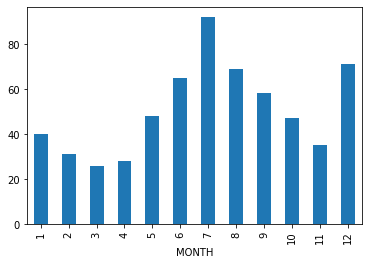

In [101]:
# grafico de barras con cantidad de transacciones que hay en Madrid a lo largo de los 12 meses del año
city_stats_month_df['DATE'].plot(kind="bar")

In [102]:
"""
CONCLUSIONES:
Vemos que los meses con más transacciones son los de verano: junio, julio, agosto y diciembre por navidad.
Vemos que el 2o cuartil y la mean de la distirbucion son 50 y 47 que son valores muy cercanos.
Y que 1er y 3er cuartil son 34 y 66 y min=26 lo que nos hace concluir que Madrid es el domicilio del usuario
"""

'\nCONCLUSIONES:\nVemos que los meses con más transacciones son los de verano: junio, julio, agosto y diciembre por navidad.\nVemos que el 2o cuartil y la mean de la distirbucion son 50 y 47 que son valores muy cercanos.\nY que 1er y 3er cuartil son 34 y 66 y min=26 lo que nos hace concluir que Madrid es el domicilio del usuario\n'

In [103]:
city_stats_month_df['DATE'].describe()

count    12.000000
mean     50.833333
std      20.462086
min      26.000000
25%      34.000000
50%      47.500000
75%      66.000000
max      92.000000
Name: DATE, dtype: float64

In [104]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['DATE'])
stat_mode

40

In [105]:
# A continuación vamos a contar las categorias en las que más transacciones hay para CITY = Madrid
pandas.set_option('display.max_rows', 50)
city_stats_nameCat_df = city_stats_df.loc[city_stats_df['CITY'] == 'Madrid'].groupby('NAME_CAT').\
count().sort_values('DATE', ascending=False)
city_stats_nameCat_df

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY,MONTH
NAME_CAT,,,,,,
category.supermercados_70,171,171,171,171,171,171
category.desayunos_menus_502,54,54,54,54,54,54
Transferencias,42,42,42,42,42,42
category.electricidad_216,32,32,32,32,32,32
category.regalos_celebraciones_117,31,31,31,31,31,31
category.dinero_bolsillo_112,30,30,30,30,30,30
category.gas_natural_219,25,25,25,25,25,25
category.taxi_499,24,24,24,24,24,24
category.recargas_468,21,21,21,21,21,21


In [106]:
# vamos a quedarnos con las 20 categorias que más observaciones tienen
city_stats_nameCat_df = city_stats_nameCat_df.iloc[:20, :]
city_stats_nameCat_df

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY,MONTH
NAME_CAT,,,,,,
category.supermercados_70,171,171,171,171,171,171
category.desayunos_menus_502,54,54,54,54,54,54
Transferencias,42,42,42,42,42,42
category.electricidad_216,32,32,32,32,32,32
category.regalos_celebraciones_117,31,31,31,31,31,31
category.dinero_bolsillo_112,30,30,30,30,30,30
category.gas_natural_219,25,25,25,25,25,25
category.taxi_499,24,24,24,24,24,24
category.recargas_468,21,21,21,21,21,21


<AxesSubplot:xlabel='NAME_CAT'>

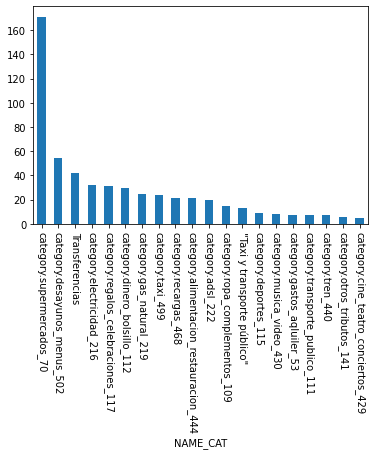

In [107]:
# grafico de barras con cantidad de transacciones que hay en Madrid
city_stats_nameCat_df['DATE'].plot(kind="bar", rot=270)

In [108]:
"""
CONCLUSIONES:
Vemos que la categoría con más transacciones es supermercados_70 y que, muchos de los gastos que aparecen en
el grafico de barras son 'gastos del hogar'.
Por lo que podemos concluir que Madrid es el domicilio habitual del usuario
"""

"\nCONCLUSIONES:\nVemos que la categoría con más transacciones es supermercados_70 y que, muchos de los gastos que aparecen en\nel grafico de barras son 'gastos del hogar'.\nPor lo que podemos concluir que Madrid es el domicilio habitual del usuario\n"

In [109]:
city_stats_nameCat_df['DATE'].describe()

count     20.000000
mean      27.400000
std       36.288899
min        5.000000
25%        7.750000
50%       20.500000
75%       30.250000
max      171.000000
Name: DATE, dtype: float64

In [110]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_nameCat_df['DATE'])
stat_mode

7

In [111]:
# vemos cuanto suman cada mes las transacciones que hay en Madrid a lo largo de los 12 meses del año
city_stats_month_df = city_stats_df.loc[city_stats_df['CITY'] == 'Madrid'].groupby('MONTH').sum()
city_stats_month_df

,AMOUNT,ID_CAT
MONTH,,
1,-1075.22,11402.0
2,-1897.54,7966.0
3,-3359.99,6390.0
4,-436.79,6414.0
5,-1512.75,11613.0
6,-1890.82,14247.0
7,-6254.68,24233.0
8,-2149.10,15027.0
9,-1259.29,14995.0


In [112]:
city_stats_month_df.drop(columns=['ID_CAT'], inplace=True)
city_stats_month_df

,AMOUNT
MONTH,
1,-1075.22
2,-1897.54
3,-3359.99
4,-436.79
5,-1512.75
6,-1890.82
7,-6254.68
8,-2149.10
9,-1259.29


In [113]:
# multiplicamos los valores de AMOUNT por -1 para mayor comodidad de trabajo
city_stats_month_df = -city_stats_month_df
city_stats_month_df

,AMOUNT
MONTH,
1,1075.22
2,1897.54
3,3359.99
4,436.79
5,1512.75
6,1890.82
7,6254.68
8,2149.10
9,1259.29


<AxesSubplot:xlabel='MONTH'>

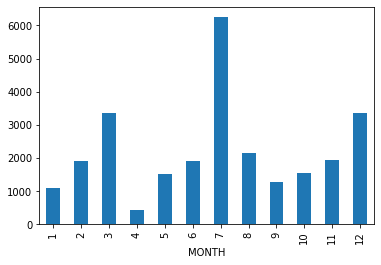

In [114]:
# grafico de barras con dinero gastado en Madrid a lo largo de los 12 meses del año
city_stats_month_df['AMOUNT'].plot(kind="bar")

In [115]:
"""
Vemos que en Madrid la mean de gastos del usuario es 2219 eur y el 2o cuartil 1894 eur.
Vemos que el mes que más gasta es julio con 6250 eur, valor que tira mucho hacia arriba la media.
Probablemente ese mes el usuario tuvo un gasto extraordinario.
Los otros dos meses en que más gasta son Marzo y Diciembre.
El mes en el que menos gastó fue abril con 436 eur.
"""

'\nVemos que en Madrid la mean de gastos del usuario es 2219 eur y el 2o cuartil 1894 eur.\nVemos que el mes que más gasta es julio con 6250 eur, valor que tira mucho hacia arriba la media.\nProbablemente ese mes el usuario tuvo un gasto extraordinario.\nLos otros dos meses en que más gasta son Marzo y Diciembre.\nEl mes en el que menos gastó fue abril con 436 eur.\n'

In [116]:
city_stats_month_df['AMOUNT'].describe()

count      12.000000
mean     2219.531667
std      1523.316104
min       436.790000
25%      1449.385000
50%      1894.180000
75%      2446.712500
max      6254.680000
Name: AMOUNT, dtype: float64

In [117]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['AMOUNT'])
stat_mode

1075.22

In [118]:
# A continuación vamos a calcular cuanto gasta en cada categoria para CITY = Madrid
pandas.set_option('display.max_rows', 50)
city_stats_nameCat_df = city_stats_df.loc[city_stats_df['CITY'] == 'Madrid'].groupby('NAME_CAT').\
sum().sort_values('AMOUNT', ascending=True)
city_stats_nameCat_df

,AMOUNT,ID_CAT,MONTH
NAME_CAT,,,
Transferencias,-15474.87,19404.0,265
category.gastos_aqluiler_53,-2800.00,371.0,41
category.supermercados_70,-2129.22,11970.0,1180
category.dinero_bolsillo_112,-1140.00,3360.0,246
category.electricidad_216,-850.99,6912.0,216
category.ropa_complementos_109,-552.57,1635.0,99
"""Taxi y transporte público""",-532.37,7072.0,93
category.desayunos_menus_502,-512.25,27108.0,390
category.regalos_celebraciones_117,-365.28,3627.0,284


In [119]:
# vamos a quedarnos con las 20 categorias que más gasto acumulan
city_stats_nameCat_df = city_stats_nameCat_df.iloc[:20, :]
city_stats_nameCat_df

,AMOUNT,ID_CAT,MONTH
NAME_CAT,,,
Transferencias,-15474.87,19404.0,265
category.gastos_aqluiler_53,-2800.00,371.0,41
category.supermercados_70,-2129.22,11970.0,1180
category.dinero_bolsillo_112,-1140.00,3360.0,246
category.electricidad_216,-850.99,6912.0,216
category.ropa_complementos_109,-552.57,1635.0,99
"""Taxi y transporte público""",-532.37,7072.0,93
category.desayunos_menus_502,-512.25,27108.0,390
category.regalos_celebraciones_117,-365.28,3627.0,284


In [120]:
city_stats_nameCat_df.drop(columns=['ID_CAT', 'MONTH'], inplace=True)
city_stats_nameCat_df

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,AMOUNT
NAME_CAT,
Transferencias,-15474.87
category.gastos_aqluiler_53,-2800.00
category.supermercados_70,-2129.22
category.dinero_bolsillo_112,-1140.00
category.electricidad_216,-850.99
category.ropa_complementos_109,-552.57
"""Taxi y transporte público""",-532.37
category.desayunos_menus_502,-512.25
category.regalos_celebraciones_117,-365.28


In [121]:
# multiplicamos los valores de AMOUNT por -1 para mayor comodidad de trabajo
city_stats_nameCat_df = -city_stats_nameCat_df
city_stats_nameCat_df

,AMOUNT
NAME_CAT,
Transferencias,15474.87
category.gastos_aqluiler_53,2800.00
category.supermercados_70,2129.22
category.dinero_bolsillo_112,1140.00
category.electricidad_216,850.99
category.ropa_complementos_109,552.57
"""Taxi y transporte público""",532.37
category.desayunos_menus_502,512.25
category.regalos_celebraciones_117,365.28


<AxesSubplot:xlabel='NAME_CAT'>

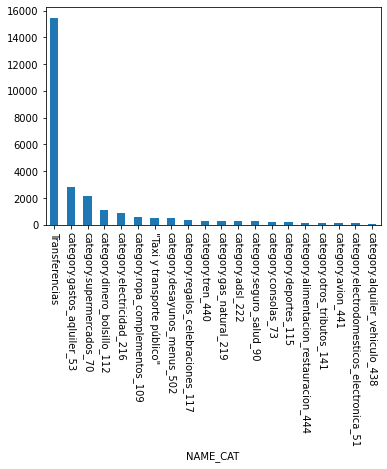

In [122]:
# grafico de barras con AMOUNT de transacciones que hay en Madrid por NAME_CAT
city_stats_nameCat_df['AMOUNT'].plot(kind="bar", rot=270)

In [123]:
"""
CONCLUSIONES:
Vemos que en Madrid la cateogoría en la que más gasta es 'Transferencias' con un gasto
15400 / 1330 = 11.6 veces superior a la media del gasto por categoria.
Probablemente esto sean gastos excepcionales por circunstancias especiales (outliers) que no podemos explicar
sólo con estos datos.

El gastos en el resto de categorías vemos que se acerca mucho más a la mean = 1330 eur y corresponden a gastos
del hogar como:
alquiler, supermercados, dinero-bolsillo, electricidad, ropa, transporte público.

CON TODOS LOS DATOS ANTERIORES PODEMOS CONCLUIR Q MADRID ES EL DOMICILIO HABITUAL DEL CLIENTE
"""

"\nCONCLUSIONES:\nVemos que en Madrid la cateogoría en la que más gasta es 'Transferencias' con un gasto\n15400 / 1330 = 11.6 veces superior a la media del gasto por categoria.\nProbablemente esto sean gastos excepcionales por circunstancias especiales (outliers) que no podemos explicar\nsólo con estos datos.\n\nEl gastos en el resto de categorías vemos que se acerca mucho más a la mean = 1330 eur y corresponden a gastos\ndel hogar como:\nalquiler, supermercados, dinero-bolsillo, electricidad, ropa, transporte público.\n\nCON TODOS LOS DATOS ANTERIORES PODEMOS COMCLUIR Q MADRID ES EL DOMICILIO HABITUAL DEL CLIENTE\n"

In [124]:
city_stats_nameCat_df['AMOUNT'].describe()

count       20.00000
mean      1330.99650
std       3402.53011
min         92.01000
25%        206.12250
50%        316.29000
75%        627.17500
max      15474.87000
Name: AMOUNT, dtype: float64

In [125]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['AMOUNT'])
stat_mode

1075.22

In [126]:
city_stats_df.groupby('CITY').count().sort_values('DATE', ascending=False)

,DATE,AMOUNT,ID_CAT,NAME_CAT,COUNTRY,MONTH
CITY,,,,,,
Madrid,610,610,610,610,610,610
Lima,10,10,10,10,10,10
Barcelona,6,6,6,6,6,6
Llucmajor,5,5,5,5,5,5
Berlin,3,3,3,3,3,3


In [127]:
# A continuación vamos a agrupar las transacciones de cada CITY por MONTH y contarlas. CITY = 'Lima'.
pandas.set_option('display.max_rows', 20)
city_stats_df.loc[city_stats_df['CITY'] == 'Lima'].groupby('MONTH').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
MONTH,,,,,,
5,1,1,1,1,1,1
6,1,1,1,1,1,1
7,2,2,2,2,2,2
8,1,1,1,1,1,1
9,2,2,2,2,2,2
10,1,1,1,1,1,1
11,1,1,1,1,1,1
12,1,1,1,1,1,1


In [128]:
# vemos la cantidad de transacciones que hay en Lima a lo largo de los 12 meses del año
city_stats_month_df = city_stats_df.loc[city_stats_df['CITY'] == 'Lima'].groupby('MONTH').count()
city_stats_month_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
MONTH,,,,,,
5,1,1,1,1,1,1
6,1,1,1,1,1,1
7,2,2,2,2,2,2
8,1,1,1,1,1,1
9,2,2,2,2,2,2
10,1,1,1,1,1,1
11,1,1,1,1,1,1
12,1,1,1,1,1,1


<AxesSubplot:xlabel='MONTH'>

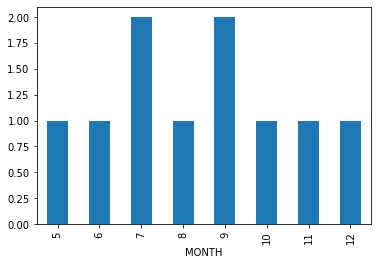

In [129]:
# grafico de barras con cantidad de transacciones que hay en Lima a lo largo de los 12 meses del año
city_stats_month_df['DATE'].plot(kind="bar")

In [130]:
"""
CONCLUSIONES:
Vemos que entre Mayo y Diciembre hay entre 1 y 2 movimientos mensuales.
A partir de estos datos no se puede concluir que el usuario haga viajes puntuales a Lima.
Más bien que hace 1 o 2 compras mensuales a un proveedor localizado en Lima.
"""

'\nCONCLUSIONES:\nVemos que entre Mayo y Diciembre hay entre 1 y 2 movimientos mensuales.\nA partir de estos datos no se puede concluir que el usuario haga viajes puntuales a Lima.\nMás bien que hace 1 o 2 compras mensuales a un proveedor localizado en Lima.\n'

In [131]:
city_stats_month_df['DATE'].describe()

count    8.00000
mean     1.25000
std      0.46291
min      1.00000
25%      1.00000
50%      1.00000
75%      1.25000
max      2.00000
Name: DATE, dtype: float64

In [132]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['DATE'])
stat_mode

1

In [133]:
# A continuación vamos a contar las categorias en las que más transacciones hay para CITY = Lima
pandas.set_option('display.max_rows', 50)
city_stats_nameCat_df = city_stats_df.loc[city_stats_df['CITY'] == 'Lima'].groupby('NAME_CAT').\
count().sort_values('DATE', ascending=False)
city_stats_nameCat_df

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY,MONTH
NAME_CAT,,,,,,
category.desayunos_menus_502,10,10,10,10,10,10


In [134]:
# vamos a quedarnos con las 20 categorias que más observaciones tienen
city_stats_nameCat_df = city_stats_nameCat_df.iloc[:20, :]
city_stats_nameCat_df

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY,MONTH
NAME_CAT,,,,,,
category.desayunos_menus_502,10,10,10,10,10,10


<AxesSubplot:xlabel='NAME_CAT'>

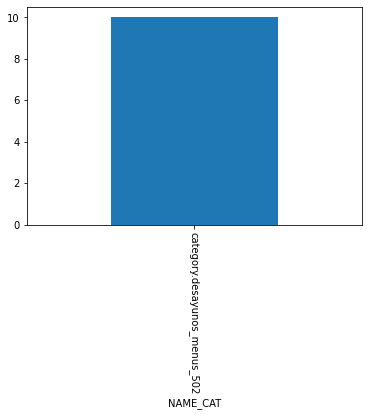

In [135]:
# grafico de barras con cantidad de transacciones que hay en Lima
city_stats_nameCat_df['DATE'].plot(kind="bar", rot=270)

In [136]:
"""
CONCLUSIONES:
Vemos que todas las transacciones corresponden a la categoria de desayunos_menus.
Luego quiza podamos concluir que 1 vez al mes al usuario le pasan un recibo por un desyuno/comida en un 
establecimiento con domicilio fiscal en Lima; o que alguien en Lima come/desayuna una vez al mes y pasa el
recibo a la cuenta de este usuario.
"""

'\nCONCLUSIONES:\nVemos que todas las transacciones corresponden a la categoria de desayunos_menus.\nLuego quiza podamos concluir que 1 vez al mes al usuario le pasan un recibo por un desyuno/comida en un \nestablecimiento con domicilio fiscal en Lima; o que alguien en Lima come/desayuna una vez al mes y pasa el\nrecibo a la cuenta de este usuario.\n'

In [137]:
city_stats_nameCat_df['DATE'].describe()

count     1.0
mean     10.0
std       NaN
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: DATE, dtype: float64

In [138]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_nameCat_df['DATE'])
stat_mode

10

In [139]:
# vemos cuanto suman cada mes las transacciones que hay en Lima a lo largo de los 12 meses del año
city_stats_month_df = city_stats_df.loc[city_stats_df['CITY'] == 'Lima'].groupby('MONTH').sum()
city_stats_month_df

,AMOUNT,ID_CAT
MONTH,,
5,-3.95,502.0
6,-7.90,502.0
7,-22.40,1004.0
8,-7.00,502.0
9,-17.78,1004.0
10,-14.00,502.0
11,-12.90,502.0
12,-5.00,502.0


In [140]:
city_stats_month_df.drop(columns=['ID_CAT'], inplace=True)
city_stats_month_df

,AMOUNT
MONTH,
5,-3.95
6,-7.90
7,-22.40
8,-7.00
9,-17.78
10,-14.00
11,-12.90
12,-5.00


In [141]:
# multiplicamos los valores de AMOUNT por -1 para mayor comodidad de trabajo
city_stats_month_df = -city_stats_month_df
city_stats_month_df

,AMOUNT
MONTH,
5,3.95
6,7.90
7,22.40
8,7.00
9,17.78
10,14.00
11,12.90
12,5.00


<AxesSubplot:xlabel='MONTH'>

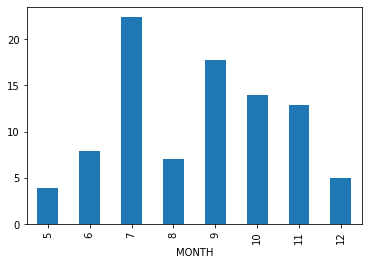

In [142]:
# grafico de barras con dinero gastado en Lima a lo largo de los 12 meses del año
city_stats_month_df['AMOUNT'].plot(kind="bar")

In [143]:
"""
CONCLUSIONES:
mean = 11 eur y 50% = 10 eur y 25% = 6.5 eur y 75% = 15 eur.
Por tanto pomedos concluir que entre mayo y diciembre, 1 vez al mes, alguien toma una comida en Lima o en un 
restaurante que hace un cargo desde una cuenta en Lima y lo carga a la cuenta del usuario.
"""

'\nCONCLUSIONES:\nmean = 11 eur y 50% = 10 eur y 25% = 6.5 eur y 75% = 15 eur.\nPor tanto pomedos concluir que entre mayo y diciembre, 1 vez al mes, alguien toma una comida en Lima o en un \nrestaurante que hace un cargo desde una cuenta en Lima y lo carga a la cuenta del usuario.\n'

In [144]:
city_stats_month_df['AMOUNT'].describe()

count     8.000000
mean     11.366250
std       6.533188
min       3.950000
25%       6.500000
50%      10.400000
75%      14.945000
max      22.400000
Name: AMOUNT, dtype: float64

In [145]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['AMOUNT'])
stat_mode

3.95

In [146]:
# A continuación vamos a calcular cuanto gasta en cada categoria para CITY = Lima
pandas.set_option('display.max_rows', 50)
city_stats_nameCat_df = city_stats_df.loc[city_stats_df['CITY'] == 'Lima'].groupby('NAME_CAT').\
sum().sort_values('AMOUNT', ascending=True)
city_stats_nameCat_df

,AMOUNT,ID_CAT,MONTH
NAME_CAT,,,
category.desayunos_menus_502,-90.93,5020.0,84


In [147]:
# vamos a quedarnos con las 20 categorias que más gasto acumulan
city_stats_nameCat_df = city_stats_nameCat_df.iloc[:20, :]
city_stats_nameCat_df

,AMOUNT,ID_CAT,MONTH
NAME_CAT,,,
category.desayunos_menus_502,-90.93,5020.0,84


In [148]:
city_stats_nameCat_df.drop(columns=['ID_CAT', 'MONTH'], inplace=True)
city_stats_nameCat_df

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,AMOUNT
NAME_CAT,
category.desayunos_menus_502,-90.93


In [149]:
# multiplicamos los valores de AMOUNT por -1 para mayor comodidad de trabajo
city_stats_nameCat_df = -city_stats_nameCat_df
city_stats_nameCat_df

,AMOUNT
NAME_CAT,
category.desayunos_menus_502,90.93


<AxesSubplot:xlabel='NAME_CAT'>

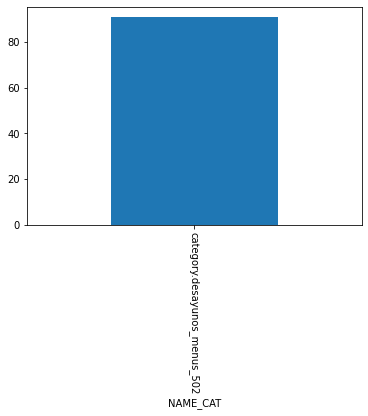

In [150]:
# grafico de barras con AMOUNT de transacciones que hay en Lima por NAME_CAT
city_stats_nameCat_df['AMOUNT'].plot(kind="bar", rot=270)

In [151]:
"""
Vemos que el total acumulado de gasto en desayunos/menus en Lima es de 90 eur.

CON TODOS LOS DATOS ANTERIORES PODEMOS CONCLUIR QUE EL USUARIO ENTRE MAYO Y DICIEMBRE 1 VEZ AL MES DESAYUNA/COME
EN LIMA O EN UN RESTAURANTE QUE PASA EL RECIBO DESDE UNA CUENTA BANCARIA EN LIMA.
"""

'\nVemos que el total acumulado de gasto en desayunos/menus en Lima es de 90 eur.\n\nCON TODOS LOS DATOS ANTERIORES PODEMOS CONCLUIR QUE EL USUARIO ENTRE MAYO Y DICIEMBRE 1 VEZ AL MES DESAYUNA/COME\nEN LIMA O EN UN RESTAURANTE QUE PASA EL RECIBO DESDE UNA CUENTA BANCARIA EN LIMA.\n'

In [152]:
city_stats_nameCat_df['AMOUNT'].describe()

count     1.00
mean     90.93
std        NaN
min      90.93
25%      90.93
50%      90.93
75%      90.93
max      90.93
Name: AMOUNT, dtype: float64

In [153]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['AMOUNT'])
stat_mode

3.95

In [154]:
city_stats_df.groupby('CITY').count().sort_values('DATE', ascending=False)

,DATE,AMOUNT,ID_CAT,NAME_CAT,COUNTRY,MONTH
CITY,,,,,,
Madrid,610,610,610,610,610,610
Lima,10,10,10,10,10,10
Barcelona,6,6,6,6,6,6
Llucmajor,5,5,5,5,5,5
Berlin,3,3,3,3,3,3


In [155]:
# A continuación vamos a agrupar las transacciones de cada CITY por MONTH y contarlas: Barcelona.
pandas.set_option('display.max_rows', 20)
city_stats_df.loc[city_stats_df['CITY'] == 'Barcelona'].groupby('MONTH').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
MONTH,,,,,,
1,2,2,2,2,2,2
6,1,1,1,1,1,1
10,3,3,3,3,3,3


In [156]:
# vemos la cantidad de transacciones que hay en Barcelona a lo largo de los 12 meses del año
city_stats_month_df = city_stats_df.loc[city_stats_df['CITY'] == 'Barcelona'].groupby('MONTH').count()
city_stats_month_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
MONTH,,,,,,
1,2,2,2,2,2,2
6,1,1,1,1,1,1
10,3,3,3,3,3,3


<AxesSubplot:xlabel='MONTH'>

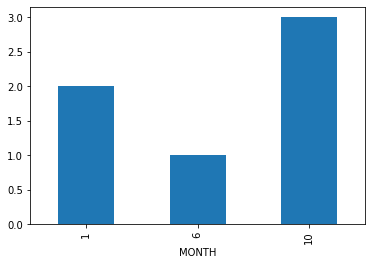

In [157]:
# grafico de barras con cantidad de transacciones que hay en Barcelona a lo largo de los 12 meses del año
city_stats_month_df['DATE'].plot(kind="bar")

In [158]:
"""
CONCLUSIONES:
Vemos que hay 2 transacciones en enero, 1 en junio y 3 en diciembre.
Esto podría corresponder a una persona que periodicamente tiene que viajar a Barcelona por trabajo y esos cargos
corresponden a gastos personales.
"""

'\nCONCLUSIONES:\nVemos que hay 2 transacciones en enero, 1 en junio y 3 en diciembre.\nEsto podría corresponder a una persona que periodicamente tiene que viajar a Barcelona por trabajo y esos cargos\ncorresponden a gastos personales.\n'

In [159]:
city_stats_month_df['DATE'].describe()

count    3.0
mean     2.0
std      1.0
min      1.0
25%      1.5
50%      2.0
75%      2.5
max      3.0
Name: DATE, dtype: float64

In [160]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['DATE'])
stat_mode

2

In [161]:
# A continuación vamos a contar las categorias en las que más transacciones hay para CITY = Barcelona
pandas.set_option('display.max_rows', 50)
city_stats_nameCat_df = city_stats_df.loc[city_stats_df['CITY'] == 'Barcelona'].groupby('NAME_CAT').\
count().sort_values('DATE', ascending=False)
city_stats_nameCat_df

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY,MONTH
NAME_CAT,,,,,,
category.museus_excursiones_445,3,3,3,3,3,3
category.taxis_transporte_publico_446,2,2,2,2,2,2
category.musica_video_430,1,1,1,1,1,1


In [162]:
# vamos a quedarnos con las 20 categorias que más observaciones tienen
city_stats_nameCat_df = city_stats_nameCat_df.iloc[:20, :]
city_stats_nameCat_df

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY,MONTH
NAME_CAT,,,,,,
category.museus_excursiones_445,3,3,3,3,3,3
category.taxis_transporte_publico_446,2,2,2,2,2,2
category.musica_video_430,1,1,1,1,1,1


<AxesSubplot:xlabel='NAME_CAT'>

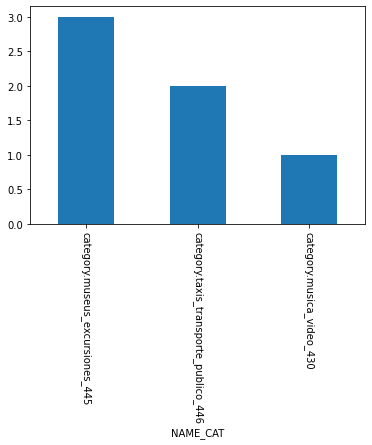

In [163]:
# grafico de barras con cantidad de transacciones que hay en Barcelona
city_stats_nameCat_df['DATE'].plot(kind="bar", rot=270)

In [164]:
"""
CONCLUSIONES:
3 transacciones son de museos-excursiones, 2 de taxis-transporte publico y 1 de musica-video que podría ser un 
regalo o un capricho para el usuario.
Estas categorías de gasto refuerzan mi teoria que pueden corresponder a gastos personales que ha hecho el usuario
a lo largo de 3 viajes de empresa.
"""

'\nCONCLUSIONES:\n3 transacciones son de museos-excursiones, 2 de taxis-transporte publico y 1 de musica-video que podría ser un \nregalo o un capricho para el usuario.\nEstas categorías de gasto refuerzan mi teoria que pueden corresponder a gastos personales que ha hecho el usuario\na lo largo de 3 viajes de empresa.\n'

In [165]:
city_stats_nameCat_df['DATE'].describe()

count    3.0
mean     2.0
std      1.0
min      1.0
25%      1.5
50%      2.0
75%      2.5
max      3.0
Name: DATE, dtype: float64

In [166]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_nameCat_df['DATE'])
stat_mode

3

In [167]:
# vemos cuanto suman cada mes las transacciones que hay en Barcelona a lo largo de los 12 meses del año
city_stats_month_df = city_stats_df.loc[city_stats_df['CITY'] == 'Barcelona'].groupby('MONTH').sum()
city_stats_month_df

,AMOUNT,ID_CAT
MONTH,,
1,-30.30,891.0
6,-3.99,430.0
10,-91.10,1336.0


In [168]:
city_stats_month_df.drop(columns=['ID_CAT'], inplace=True)
city_stats_month_df

,AMOUNT
MONTH,
1,-30.30
6,-3.99
10,-91.10


In [169]:
# multiplicamos los valores de AMOUNT por -1 para mayor comodidad de trabajo
city_stats_month_df = -city_stats_month_df
city_stats_month_df

,AMOUNT
MONTH,
1,30.30
6,3.99
10,91.10


<AxesSubplot:xlabel='MONTH'>

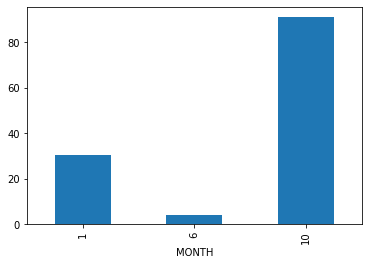

In [170]:
# grafico de barras con dinero gastado en Barcelona a lo largo de los 12 meses del año
city_stats_month_df['AMOUNT'].plot(kind="bar")

In [171]:
"""
CONCLUSIONES:
Vemos que el mayor gasto lo hizo en octubre con 91 eur, en enero 30 eur y en junio 4 eur.
Pueden corresponder a gastos hechos con la tarjeta personal en un viaje de empresa.
"""

'\nCONCLUSIONES:\nVemos que el mayor gasto lo hizo en octubre con 91 eur, en enero 30 eur y en junio 4 eur.\nPueden corresponder a gastos hechos con la tarjeta personal en un viaje de empresa.\n'

In [172]:
city_stats_month_df['AMOUNT'].describe()

count     3.000000
mean     41.796667
std      44.678496
min       3.990000
25%      17.145000
50%      30.300000
75%      60.700000
max      91.100000
Name: AMOUNT, dtype: float64

In [173]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['AMOUNT'])
stat_mode

30.3

In [174]:
# A continuación vamos a calcular cuanto gasta en cada categoria para CITY = Barcelona
pandas.set_option('display.max_rows', 50)
city_stats_nameCat_df = city_stats_df.loc[city_stats_df['CITY'] == 'Barcelona'].groupby('NAME_CAT').\
sum().sort_values('AMOUNT', ascending=True)
city_stats_nameCat_df

,AMOUNT,ID_CAT,MONTH
NAME_CAT,,,
category.museus_excursiones_445,-106.50,1335.0,21
category.taxis_transporte_publico_446,-14.90,892.0,11
category.musica_video_430,-3.99,430.0,6


In [175]:
# vamos a quedarnos con las 20 categorias que más gasto acumulan
city_stats_nameCat_df = city_stats_nameCat_df.iloc[:20, :]
city_stats_nameCat_df

,AMOUNT,ID_CAT,MONTH
NAME_CAT,,,
category.museus_excursiones_445,-106.50,1335.0,21
category.taxis_transporte_publico_446,-14.90,892.0,11
category.musica_video_430,-3.99,430.0,6


In [176]:
city_stats_nameCat_df.drop(columns=['ID_CAT', 'MONTH'], inplace=True)
city_stats_nameCat_df

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,AMOUNT
NAME_CAT,
category.museus_excursiones_445,-106.50
category.taxis_transporte_publico_446,-14.90
category.musica_video_430,-3.99


In [177]:
# multiplicamos los valores de AMOUNT por -1 para mayor comodidad de trabajo
city_stats_nameCat_df = -city_stats_nameCat_df
city_stats_nameCat_df

,AMOUNT
NAME_CAT,
category.museus_excursiones_445,106.50
category.taxis_transporte_publico_446,14.90
category.musica_video_430,3.99


<AxesSubplot:xlabel='NAME_CAT'>

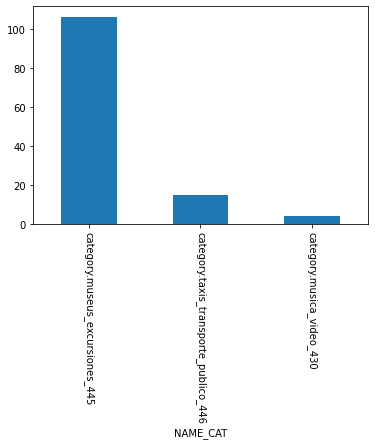

In [178]:
# grafico de barras con AMOUNT de transacciones que hay en Barcelona por NAME_CAT
city_stats_nameCat_df['AMOUNT'].plot(kind="bar", rot=270)

In [179]:
"""
CONCLUSIONES:
Vemos que el cliente gasto 100 eur en museos-excursiones, 20 en taxis-transporte publico y 5 en musica-video.
Son claros patrones de gastos efectuados con la tarjeta personal en viajes de empresa cortos a Barcelona en 
enero, junio y octubre.

NO OBSTANTE ES MUY AVENTURADO OBTENER PATRONES DE COMPORTAMIENTO DEL CLIENTE CON TAN POCAS OBSERVACIONES Y CON 
DATOS ENTRE 2019 Y 2021 Y ADEMÁS JUSTO DURANTE LA PANDEMIA DEL COVID-19
"""

'\nCONCLUSIONES:\nVemos que el cliente gasto 100 eur en museos-excursiones, 20 en taxis-transporte publico y 5 en musica-video.\nSon claros patrones de gastos efectuados con la tarjeta personal en viajes de empresa cortos a Barcelona en \nenero, junio y octubre.\n\nNO OBSTANTE ES MUY AVENTURADO OBTENER PATRONES DE COMPORTAMIENTO DEL CLIENTE CON TAN POCAS OBSERVACIONES Y CON \nDATOS ENTRE 2019 Y 2021 Y ADEMÁS JUSTO DURANTE LA PANDEMIA DEL COVID-19\n'

In [180]:
city_stats_nameCat_df['AMOUNT'].describe()

count      3.000000
mean      41.796667
std       56.299627
min        3.990000
25%        9.445000
50%       14.900000
75%       60.700000
max      106.500000
Name: AMOUNT, dtype: float64

In [181]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['AMOUNT'])
stat_mode

30.3

In [182]:
city_stats_df.groupby('CITY').count().sort_values('DATE', ascending=False)

,DATE,AMOUNT,ID_CAT,NAME_CAT,COUNTRY,MONTH
CITY,,,,,,
Madrid,610,610,610,610,610,610
Lima,10,10,10,10,10,10
Barcelona,6,6,6,6,6,6
Llucmajor,5,5,5,5,5,5
Berlin,3,3,3,3,3,3


In [183]:
# A continuación vamos a agrupar las transacciones de cada CITY por MONTH y contarlas: Llucmajor
pandas.set_option('display.max_rows', 20)
city_stats_df.loc[city_stats_df['CITY'] == 'Llucmajor'].groupby('MONTH').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
MONTH,,,,,,
3,1,1,1,1,1,1
5,1,1,1,1,1,1
6,1,1,1,1,1,1
7,1,1,1,1,1,1
12,1,1,1,1,1,1


In [184]:
# vemos la cantidad de transacciones que hay en Llucmajor a lo largo de los 12 meses del año
city_stats_month_df = city_stats_df.loc[city_stats_df['CITY'] == 'Llucmajor'].groupby('MONTH').count()
city_stats_month_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
MONTH,,,,,,
3,1,1,1,1,1,1
5,1,1,1,1,1,1
6,1,1,1,1,1,1
7,1,1,1,1,1,1
12,1,1,1,1,1,1


<AxesSubplot:xlabel='MONTH'>

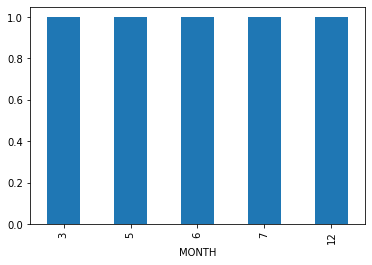

In [185]:
# grafico de barras con cantidad de transacciones que hay en Llucmajor a lo largo de los 12 meses del año
city_stats_month_df['DATE'].plot(kind="bar")

In [189]:
"""
CONCLUSIONES:
Vemos que hay 1 transaccion en los meses de Marzo, Mayo, Junio, Julio y Diciembre.

Con tan pocos datos no es posible extraer conclusiones fiables. Podemos aventurarnos a decir q o bien son gastos
personales realizados por el usuario en viajes de empresa. O bien son compras realizadas por un usuario en una 
tienda fisica u online con domicilio en Llucmajor.
"""

'\nCONCLUSIONES:\nVemos que hay 1 transaccion en los meses de Marzo, Mayo, Junio, Julio y Diciembre.\n\nCon tan pocos datos no es posible extraer conclusiones fiables. Podemos aventurarnos a decir q o bien son gastos\npersonales realizados por el usuario en viajes de empresa. O bien son compras realizadas por un usuario en una \ntienda fisica u online con domicilio en Llucmajor.\n'

In [190]:
city_stats_month_df['DATE'].describe()

count    5.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: DATE, dtype: float64

In [191]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['DATE'])
stat_mode

1

In [192]:
# A continuación vamos a contar las categorias en las que más transacciones hay para CITY = Llucmajor
pandas.set_option('display.max_rows', 50)
city_stats_nameCat_df = city_stats_df.loc[city_stats_df['CITY'] == 'Llucmajor'].groupby('NAME_CAT').\
count().sort_values('DATE', ascending=False)
city_stats_nameCat_df

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY,MONTH
NAME_CAT,,,,,,
category.adsl_222,5,5,5,5,5,5


In [193]:
# vamos a quedarnos con las 20 categorias que más observaciones tienen
city_stats_nameCat_df = city_stats_nameCat_df.iloc[:20, :]
city_stats_nameCat_df

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY,MONTH
NAME_CAT,,,,,,
category.adsl_222,5,5,5,5,5,5


<AxesSubplot:xlabel='NAME_CAT'>

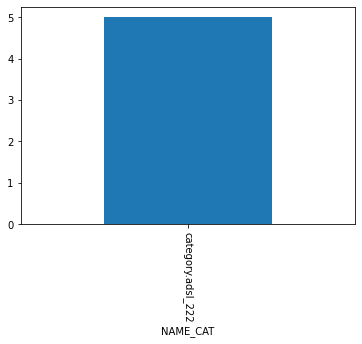

In [194]:
# grafico de barras con cantidad de transacciones que hay en Llucmajor
city_stats_nameCat_df['DATE'].plot(kind="bar", rot=270)

In [195]:
"""
CONCLUSIONES:
Vemos que todas las categorias corresponden a ADSL.
Lo más logico es afirmar que el cliente tiene el ADSL contratado con una empresa localizada en Llucmajor y que le
han pasado recibos en los meses de Marzo, Mayo, Junio, Julio y Diciembre.
"""

'\nCONCLUSIONES:\nVemos que todas las categorias corresponden a ADSL.\nLo más logico es afirmar que el cliente tiene el ADSL contratado con una empresa localizada en Llucmajor y que le\nhan pasado recibos en los meses de Marzo, Mayo, Junio, Julio y Diciembre.\n'

In [196]:
city_stats_nameCat_df['DATE'].describe()

count    1.0
mean     5.0
std      NaN
min      5.0
25%      5.0
50%      5.0
75%      5.0
max      5.0
Name: DATE, dtype: float64

In [197]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_nameCat_df['DATE'])
stat_mode

5

In [198]:
# vemos cuanto suman cada mes las transacciones que hay en Llucmajor a lo largo de los 12 meses del año
city_stats_month_df = city_stats_df.loc[city_stats_df['CITY'] == 'Llucmajor'].groupby('MONTH').sum()
city_stats_month_df

,AMOUNT,ID_CAT
MONTH,,
3,-14.50,222.0
5,-34.61,222.0
6,-34.61,222.0
7,-28.83,222.0
12,-94.25,222.0


In [199]:
city_stats_month_df.drop(columns=['ID_CAT'], inplace=True)
city_stats_month_df

,AMOUNT
MONTH,
3,-14.50
5,-34.61
6,-34.61
7,-28.83
12,-94.25


In [200]:
# multiplicamos los valores de AMOUNT por -1 para mayor comodidad de trabajo
city_stats_month_df = -city_stats_month_df
city_stats_month_df

,AMOUNT
MONTH,
3,14.50
5,34.61
6,34.61
7,28.83
12,94.25


<AxesSubplot:xlabel='MONTH'>

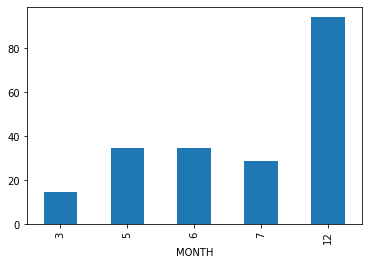

In [201]:
# grafico de barras con dinero gastado en Llucmajor a lo largo de los 12 meses del año
city_stats_month_df['AMOUNT'].plot(kind="bar")

In [205]:
"""
CONCLUSIONES:
Vemos que mean = 41 eur y 50% = 34.61 eur.
Con lo que podemos decir que el recibo medio de adsl del usuario es de unos 35 eur.
"""

'\nCONCLUSIONES:\nVemos que mean = 41 eur y 50% = 34.61 eur.\nCon lo que podemos decir que el recibo medio de adsl del usuario es de unos 35 eur.\n'

In [206]:
city_stats_month_df['AMOUNT'].describe()

count     5.000000
mean     41.360000
std      30.687691
min      14.500000
25%      28.830000
50%      34.610000
75%      34.610000
max      94.250000
Name: AMOUNT, dtype: float64

In [207]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['AMOUNT'])
stat_mode

34.61

In [208]:
# A continuación vamos a calcular cuanto gasta en cada categoria para CITY = Llucmajor
pandas.set_option('display.max_rows', 50)
city_stats_nameCat_df = city_stats_df.loc[city_stats_df['CITY'] == 'Llucmajor'].groupby('NAME_CAT').\
sum().sort_values('AMOUNT', ascending=True)
city_stats_nameCat_df

,AMOUNT,ID_CAT,MONTH
NAME_CAT,,,
category.adsl_222,-206.8,1110.0,33


In [209]:
# vamos a quedarnos con las 20 categorias que más gasto acumulan
city_stats_nameCat_df = city_stats_nameCat_df.iloc[:20, :]
city_stats_nameCat_df

,AMOUNT,ID_CAT,MONTH
NAME_CAT,,,
category.adsl_222,-206.8,1110.0,33


In [210]:
city_stats_nameCat_df.drop(columns=['ID_CAT', 'MONTH'], inplace=True)
city_stats_nameCat_df

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,AMOUNT
NAME_CAT,
category.adsl_222,-206.8


In [211]:
# multiplicamos los valores de AMOUNT por -1 para mayor comodidad de trabajo
city_stats_nameCat_df = -city_stats_nameCat_df
city_stats_nameCat_df

,AMOUNT
NAME_CAT,
category.adsl_222,206.8


<AxesSubplot:xlabel='NAME_CAT'>

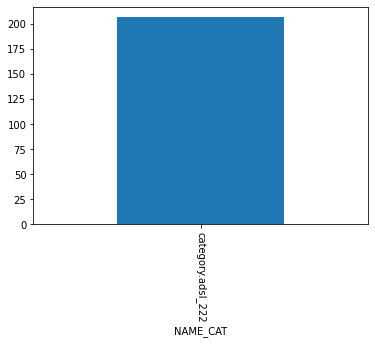

In [212]:
# grafico de barras con AMOUNT de transacciones que hay en Llucmajor por NAME_CAT
city_stats_nameCat_df['AMOUNT'].plot(kind="bar", rot=270)

In [213]:
"""
CONCLUSIONES:
Vemos que en el periodo de tiempo analizado el cliente pago recibos de ADSL a un proveedor localiza en Llucmajor
por importe de 206 eur.
"""

'\nCONCLUSIONES:\nVemos que en el periodo de tiempo analizado el cliente pago recibos de ADSL a un proveedor localiza en Llucmajor\npor importe de 206 eur.\n'

In [214]:
city_stats_nameCat_df['AMOUNT'].describe()

count      1.0
mean     206.8
std        NaN
min      206.8
25%      206.8
50%      206.8
75%      206.8
max      206.8
Name: AMOUNT, dtype: float64

In [215]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['AMOUNT'])
stat_mode

34.61

In [216]:
city_stats_df.groupby('CITY').count().sort_values('DATE', ascending=False)

,DATE,AMOUNT,ID_CAT,NAME_CAT,COUNTRY,MONTH
CITY,,,,,,
Madrid,610,610,610,610,610,610
Lima,10,10,10,10,10,10
Barcelona,6,6,6,6,6,6
Llucmajor,5,5,5,5,5,5
Berlin,3,3,3,3,3,3


In [217]:
# A continuación vamos a agrupar las transacciones de cada CITY por MONTH y contarlas: Berlin
pandas.set_option('display.max_rows', 20)
city_stats_df.loc[city_stats_df['CITY'] == 'Berlin'].groupby('MONTH').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
MONTH,,,,,,
6,2,2,2,2,2,2
11,1,1,1,1,1,1


In [218]:
# vemos la cantidad de transacciones que hay en Madrid a lo largo de los 12 meses del año
city_stats_month_df = city_stats_df.loc[city_stats_df['CITY'] == 'Berlin'].groupby('MONTH').count()
city_stats_month_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
MONTH,,,,,,
6,2,2,2,2,2,2
11,1,1,1,1,1,1


<AxesSubplot:xlabel='MONTH'>

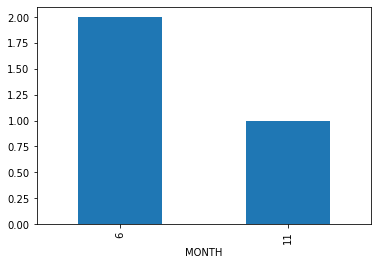

In [219]:
# grafico de barras con cantidad de transacciones que hay en Berlin a lo largo de los 12 meses del año
city_stats_month_df['DATE'].plot(kind="bar")

In [222]:
"""
CONCLUSIONES:
Vemos que hay dos transacciones en junio y una noviembre.
Con tan pocas observaciones es muy aventurado intentar sacar patrones de comportamiento del usuario.
Quizá podemos decir que esas observaciones corresponden a gastos personales realizados por el usuario en viajes de
empresa a Alemania.
"""

'\nCONCLUSIONES:\nVemos que hay dos transacciones en junio y una noviembre.\nCon tan pocas observaciones es muy aventurado intentar sacar patrones de comportamiento del usuario.\nQuizá podemos decir que esas observaciones corresponden a gastos personales realizados por el usuario en viajes de\nempresa a Alemania.\n'

In [223]:
city_stats_month_df['DATE'].describe()

count    2.000000
mean     1.500000
std      0.707107
min      1.000000
25%      1.250000
50%      1.500000
75%      1.750000
max      2.000000
Name: DATE, dtype: float64

In [224]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['DATE'])
stat_mode

2

In [225]:
# A continuación vamos a contar las categorias en las que más transacciones hay para CITY = Madrid
pandas.set_option('display.max_rows', 50)
city_stats_nameCat_df = city_stats_df.loc[city_stats_df['CITY'] == 'Berlin'].groupby('NAME_CAT').\
count().sort_values('DATE', ascending=False)
city_stats_nameCat_df

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY,MONTH
NAME_CAT,,,,,,
category.otros_449,2,2,2,2,2,2
category.otros_tributos_141,1,1,1,1,1,1


In [226]:
# vamos a quedarnos con las 20 categorias que más observaciones tienen
city_stats_nameCat_df = city_stats_nameCat_df.iloc[:20, :]
city_stats_nameCat_df

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY,MONTH
NAME_CAT,,,,,,
category.otros_449,2,2,2,2,2,2
category.otros_tributos_141,1,1,1,1,1,1


<AxesSubplot:xlabel='NAME_CAT'>

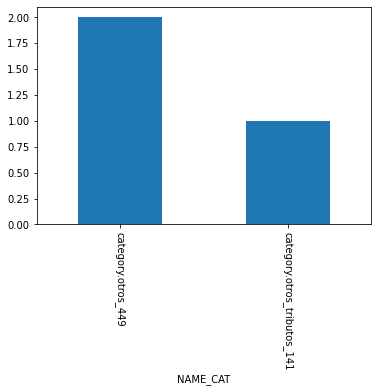

In [227]:
# grafico de barras con cantidad de transacciones que hay en Berlin
city_stats_nameCat_df['DATE'].plot(kind="bar", rot=270)

In [228]:
"""
CONCLUSIONES:
Vemos que hay dos transacciones que correponden a otros_449 y otra que corresponde a tributos_449.
No podemos hacer predicciones ni encontrar patrones de comportamiento en el usuario con 3 observaciones que
además están asociadas a categoría con nombres tan genéricos.
Quizá podríamos decir que estas transacciones correspondan a compras online a una empresa con sede social/fiscal
en Alemania.
"""

'\nCONCLUSIONES:\nVemos que hay dos transacciones que correponden a otros_449 y otra que corresponde a tributos_449.\nNo podemos hacer predicciones ni encontrar patrones de comportamiento en el usuario con 3 observaciones que\nademás están asociadas a categoría con nombres tan genéricos.\nQuizá podríamos decir que estas transacciones correspondan a compras online a una empresa con sede social/fiscal\nen Alemania.\n'

In [229]:
city_stats_nameCat_df['DATE'].describe()

count    2.000000
mean     1.500000
std      0.707107
min      1.000000
25%      1.250000
50%      1.500000
75%      1.750000
max      2.000000
Name: DATE, dtype: float64

In [230]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_nameCat_df['DATE'])
stat_mode

2

In [231]:
# vemos cuanto suman cada mes las transacciones que hay en Berlin a lo largo de los 12 meses del año
city_stats_month_df = city_stats_df.loc[city_stats_df['CITY'] == 'Berlin'].groupby('MONTH').sum()
city_stats_month_df

,AMOUNT,ID_CAT
MONTH,,
6,-50.74,898.0
11,-10.00,141.0


In [232]:
city_stats_month_df.drop(columns=['ID_CAT'], inplace=True)
city_stats_month_df

,AMOUNT
MONTH,
6,-50.74
11,-10.00


In [233]:
# multiplicamos los valores de AMOUNT por -1 para mayor comodidad de trabajo
city_stats_month_df = -city_stats_month_df
city_stats_month_df

,AMOUNT
MONTH,
6,50.74
11,10.00


<AxesSubplot:xlabel='MONTH'>

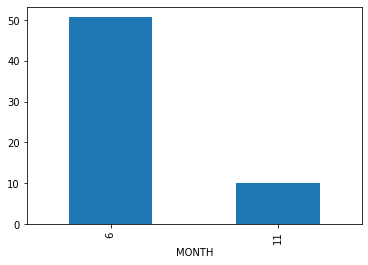

In [234]:
# grafico de barras con dinero gastado en Berlin a lo largo de los 12 meses del año
city_stats_month_df['AMOUNT'].plot(kind="bar")

In [235]:
"""
CONCLUSIONES:
Vemos que en julio el usuario en Berlin acumula gastos por valor de 50 eur y en noviembre por 10 eur.

En linea con la asuncion hecha en la conclusiones anteriores podríamos aventurarnos a decir en junio el usuario
hizo comprar onine por valor 50 eur a un proveedor con domicilio fiscal/social en Berlin y en noviembre le
pasaron 10 eur en impuestos por dichas compras (quiza un IVA de un 20%).
"""

'\nCONCLUSIONES:\nVemos que en julio el usuario en Berlin acumula gastos por valor de 50 eur y en novi por 10 eur.\n\nEn linea con la asuncion hecha en la conclusiones anteriores podríamos aventurarnos a decir en junio el usuario\nhizo comprar onine por valor 50 eur a un proveedor con domicilio fiscal/social en Berlin y en noviembre le\npasaron 10 eur en impuestos por dichas compras (quiza un IVA de un 20%).\n'

In [236]:
city_stats_month_df['AMOUNT'].describe()

count     2.00000
mean     30.37000
std      28.80753
min      10.00000
25%      20.18500
50%      30.37000
75%      40.55500
max      50.74000
Name: AMOUNT, dtype: float64

In [237]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['AMOUNT'])
stat_mode

50.74

In [238]:
# A continuación vamos a calcular cuanto gasta en cada categoria para CITY = Berlin
pandas.set_option('display.max_rows', 50)
city_stats_nameCat_df = city_stats_df.loc[city_stats_df['CITY'] == 'Berlin'].groupby('NAME_CAT').\
sum().sort_values('AMOUNT', ascending=True)
city_stats_nameCat_df

,AMOUNT,ID_CAT,MONTH
NAME_CAT,,,
category.otros_449,-50.74,898.0,12
category.otros_tributos_141,-10.00,141.0,11


In [239]:
# vamos a quedarnos con las 20 categorias que más gasto acumulan
city_stats_nameCat_df = city_stats_nameCat_df.iloc[:20, :]
city_stats_nameCat_df

,AMOUNT,ID_CAT,MONTH
NAME_CAT,,,
category.otros_449,-50.74,898.0,12
category.otros_tributos_141,-10.00,141.0,11


In [240]:
city_stats_nameCat_df.drop(columns=['ID_CAT', 'MONTH'], inplace=True)
city_stats_nameCat_df

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,AMOUNT
NAME_CAT,
category.otros_449,-50.74
category.otros_tributos_141,-10.00


In [241]:
# multiplicamos los valores de AMOUNT por -1 para mayor comodidad de trabajo
city_stats_nameCat_df = -city_stats_nameCat_df
city_stats_nameCat_df

,AMOUNT
NAME_CAT,
category.otros_449,50.74
category.otros_tributos_141,10.00


<AxesSubplot:xlabel='NAME_CAT'>

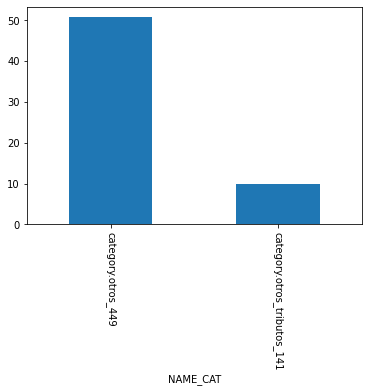

In [242]:
# grafico de barras con AMOUNT de transacciones que hay en Madrid por NAME_CAT
city_stats_nameCat_df['AMOUNT'].plot(kind="bar", rot=270)

In [243]:
"""
CONCLUSIONES:
Nos reiteramos en nuestra asunción: en junio hizo dos compras por valor de 25 eur a un proveedor con sede 
social/fiscal en Berlin y en noviembre le pasarón los impuestos por un valor de 10 eur que corresponden al
20% (IVA?) del valor de dichas compras.
"""

'\nCONCLUSIONES:\nNos reiteramos en nuestra asunción: en junio hizo dos compras por valor de 25 eur a un proveedor con sede \nsocial/fiscal en Berlin y en noviembre le pasarón los impuestos por un valor de 10 eur que corresponden al\n20% (IVA?) del valor de dichas compras.\n'

In [244]:
city_stats_nameCat_df['AMOUNT'].describe()

count     2.00000
mean     30.37000
std      28.80753
min      10.00000
25%      20.18500
50%      30.37000
75%      40.55500
max      50.74000
Name: AMOUNT, dtype: float64

In [245]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['AMOUNT'])
stat_mode

50.74

In [250]:
# repito el estudio anterior pero esta vez analizando por países.
city_stats_df.groupby('COUNTRY').count().sort_values('DATE', ascending=False)

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,MONTH
COUNTRY,,,,,,
España,621,621,621,621,621,621
Perú,10,10,10,10,10,10
Alemania,3,3,3,3,3,3


In [251]:
# A continuación vamos a agrupar las transacciones de cada COUNTRY por MONTH y contarlas. Empezamos con España.
pandas.set_option('display.max_rows', 20)
city_stats_df.loc[city_stats_df['COUNTRY'] == 'España'].groupby('MONTH').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
MONTH,,,,,,
1,42,42,42,42,42,42
2,31,31,31,31,31,31
3,27,27,27,27,27,27
4,28,28,28,28,28,28
5,49,49,49,49,49,49
6,67,67,67,67,67,67
7,93,93,93,93,93,93
8,69,69,69,69,69,69
9,58,58,58,58,58,58


In [252]:
# vemos la cantidad de transacciones que hay en España a lo largo de los 12 meses del año
city_stats_month_df = city_stats_df.loc[city_stats_df['COUNTRY'] == 'España'].groupby('MONTH').count()
city_stats_month_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
MONTH,,,,,,
1,42,42,42,42,42,42
2,31,31,31,31,31,31
3,27,27,27,27,27,27
4,28,28,28,28,28,28
5,49,49,49,49,49,49
6,67,67,67,67,67,67
7,93,93,93,93,93,93
8,69,69,69,69,69,69
9,58,58,58,58,58,58


<AxesSubplot:xlabel='MONTH'>

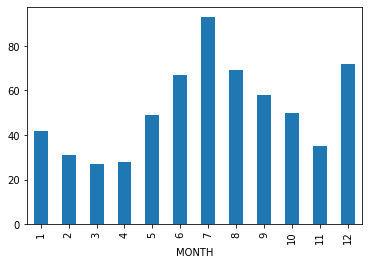

In [253]:
# grafico de barras con cantidad de transacciones que hay en España a lo largo de los 12 meses del año
city_stats_month_df['DATE'].plot(kind="bar")

In [256]:
"""
CONCLUSIONES:
Al igual que con CITY = Madrid;
Vemos que los meses con más transacciones son los de verano desde mayo a octubre y diciembre por navidad.
Vemos que el 2o cuartil y la mean de la distribucion son 50 y 51 que son valores muy cercanos.
Y que 1er y 3er cuartil son 34 y 67 y min=27 lo que nos hace concluir que España es el domicilio del usuario
"""

'\nCONCLUSIONES:\nAl igual que con CITY=Madrid;\nVemos que los meses con más transacciones son los de verano desde mayo a octubre y diciembre por navidad.\nVemos que el 2o cuartil y la mean de la distribucion son 50 y 51 que son valores muy cercanos.\nY que 1er y 3er cuartil son 34 y 67 y min=27 lo que nos hace concluir que España es el domicilio del usuario\n'

In [254]:
city_stats_month_df['DATE'].describe()

count    12.000000
mean     51.750000
std      20.613874
min      27.000000
25%      34.000000
50%      49.500000
75%      67.500000
max      93.000000
Name: DATE, dtype: float64

In [255]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['DATE'])
stat_mode

42

In [258]:
# A continuación vamos a contar las categorias en las que más transacciones hay para COUNTRY = España
pandas.set_option('display.max_rows', 50)
city_stats_nameCat_df = city_stats_df.loc[city_stats_df['COUNTRY'] == 'España'].groupby('NAME_CAT').\
count().sort_values('DATE', ascending=False)
city_stats_nameCat_df

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY,MONTH
NAME_CAT,,,,,,
category.supermercados_70,171,171,171,171,171,171
category.desayunos_menus_502,54,54,54,54,54,54
Transferencias,42,42,42,42,42,42
category.electricidad_216,32,32,32,32,32,32
category.regalos_celebraciones_117,31,31,31,31,31,31
category.dinero_bolsillo_112,30,30,30,30,30,30
category.adsl_222,25,25,25,25,25,25
category.gas_natural_219,25,25,25,25,25,25
category.taxi_499,24,24,24,24,24,24


In [259]:
# vamos a quedarnos con las 20 categorias que más observaciones tienen
city_stats_nameCat_df = city_stats_nameCat_df.iloc[:20, :]
city_stats_nameCat_df

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY,MONTH
NAME_CAT,,,,,,
category.supermercados_70,171,171,171,171,171,171
category.desayunos_menus_502,54,54,54,54,54,54
Transferencias,42,42,42,42,42,42
category.electricidad_216,32,32,32,32,32,32
category.regalos_celebraciones_117,31,31,31,31,31,31
category.dinero_bolsillo_112,30,30,30,30,30,30
category.adsl_222,25,25,25,25,25,25
category.gas_natural_219,25,25,25,25,25,25
category.taxi_499,24,24,24,24,24,24


<AxesSubplot:xlabel='NAME_CAT'>

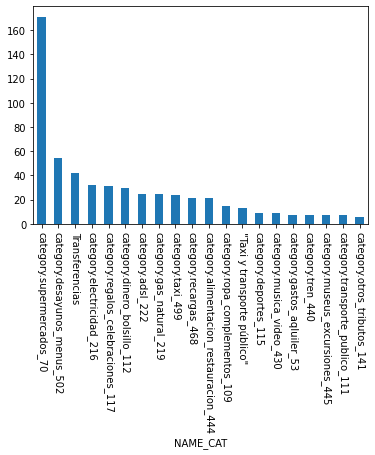

In [260]:
# grafico de barras con cantidad de transacciones que hay en España
city_stats_nameCat_df['DATE'].plot(kind="bar", rot=270)

In [296]:
"""
CONCLUSIONES:
Al igual que pasaba con CITY = Madrid,
Vemos que la categoría con más transacciones es supermercados_70 y que, muchos de los gastos que aparecen en
el grafico de barras son 'gastos del hogar'.
Por lo que podemos concluir que España es el domicilio habitual del usuario
"""

"\nCONCLUSIONES:\nAl igual que pasaba con CITY = Madrid,\nVemos que la categoría con más transacciones es supermercados_70 y que, muchos de los gastos que aparecen en\nel grafico de barras son 'gastos del hogar'.\nPor lo que podemos concluir que España es el domicilio habitual del usuario\n"

In [261]:
city_stats_nameCat_df['DATE'].describe()

count     20.000000
mean      27.800000
std       36.161334
min        6.000000
25%        8.500000
50%       21.000000
75%       30.250000
max      171.000000
Name: DATE, dtype: float64

In [262]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_nameCat_df['DATE'])
stat_mode

7

In [263]:
# vemos cuanto suman cada mes las transacciones que hay en España a lo largo de los 12 meses del año
city_stats_month_df = city_stats_df.loc[city_stats_df['COUNTRY'] == 'España'].groupby('MONTH').sum()
city_stats_month_df

,AMOUNT,ID_CAT
MONTH,,
1,-1105.52,12293.0
2,-1897.54,7966.0
3,-3374.49,6612.0
4,-436.79,6414.0
5,-1547.36,11835.0
6,-1929.42,14899.0
7,-6283.51,24455.0
8,-2149.10,15027.0
9,-1259.29,14995.0


In [264]:
city_stats_month_df.drop(columns=['ID_CAT'], inplace=True)
city_stats_month_df

,AMOUNT
MONTH,
1,-1105.52
2,-1897.54
3,-3374.49
4,-436.79
5,-1547.36
6,-1929.42
7,-6283.51
8,-2149.10
9,-1259.29


In [265]:
# multiplicamos los valores de AMOUNT por -1 para mayor comodidad de trabajo
city_stats_month_df = -city_stats_month_df
city_stats_month_df

,AMOUNT
MONTH,
1,1105.52
2,1897.54
3,3374.49
4,436.79
5,1547.36
6,1929.42
7,6283.51
8,2149.10
9,1259.29


<AxesSubplot:xlabel='MONTH'>

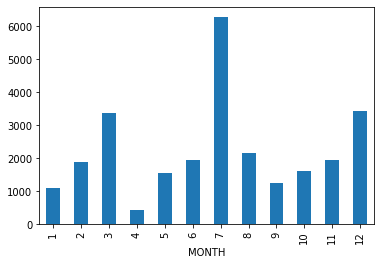

In [266]:
# grafico de barras con dinero gastado en España a lo largo de los 12 meses del año
city_stats_month_df['AMOUNT'].plot(kind="bar")

In [295]:
"""
CONCLUSIONES:
Al igual que con CITY='Madrid'
Vemos que en Madrid la mean de gastos del usuario es 2247 eur y el 2o cuartil 1913 eur.
Vemos que el mes que más gasta es julio con 6283 eur, valor que tira mucho hacia arriba la media.
Probablemente ese mes el usuario tuvo un gasto extraordinario.
Los otros dos meses en que más gasta son Marzo y Diciembre.
El mes en el que menos gastó fue abril con 436 eur.
"""

"\nCONCLUSIONES:\nAl igual que con CITY='Madrid'\nVemos que en Madrid la mean de gastos del usuario es 2247 eur y el 2o cuartil 1913 eur.\nVemos que el mes que más gasta es julio con 6283 eur, valor que tira mucho hacia arriba la media.\nProbablemente ese mes el usuario tuvo un gasto extraordinario.\nLos otros dos meses en que más gasta son Marzo y Diciembre.\nEl mes en el que menos gastó fue abril con 436 eur.\n"

In [267]:
city_stats_month_df['AMOUNT'].describe()

count      12.000000
mean     2247.214167
std      1529.860167
min       436.790000
25%      1475.342500
50%      1913.480000
75%      2455.447500
max      6283.510000
Name: AMOUNT, dtype: float64

In [268]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['AMOUNT'])
stat_mode

1105.52

In [269]:
# A continuación vamos a calcular cuanto gasta en cada categoria para COUNTRY = España
pandas.set_option('display.max_rows', 50)
city_stats_nameCat_df = city_stats_df.loc[city_stats_df['COUNTRY'] == 'España'].groupby('NAME_CAT').\
sum().sort_values('AMOUNT', ascending=True)
city_stats_nameCat_df

,AMOUNT,ID_CAT,MONTH
NAME_CAT,,,
Transferencias,-15474.87,19404.0,265
category.gastos_aqluiler_53,-2800.00,371.0,41
category.supermercados_70,-2129.22,11970.0,1180
category.dinero_bolsillo_112,-1140.00,3360.0,246
category.electricidad_216,-850.99,6912.0,216
category.ropa_complementos_109,-552.57,1635.0,99
"""Taxi y transporte público""",-532.37,7072.0,93
category.adsl_222,-521.80,5550.0,148
category.desayunos_menus_502,-512.25,27108.0,390


In [270]:
# vamos a quedarnos con las 20 categorias que más gasto acumulan
city_stats_nameCat_df = city_stats_nameCat_df.iloc[:20, :]
city_stats_nameCat_df

,AMOUNT,ID_CAT,MONTH
NAME_CAT,,,
Transferencias,-15474.87,19404.0,265
category.gastos_aqluiler_53,-2800.00,371.0,41
category.supermercados_70,-2129.22,11970.0,1180
category.dinero_bolsillo_112,-1140.00,3360.0,246
category.electricidad_216,-850.99,6912.0,216
category.ropa_complementos_109,-552.57,1635.0,99
"""Taxi y transporte público""",-532.37,7072.0,93
category.adsl_222,-521.80,5550.0,148
category.desayunos_menus_502,-512.25,27108.0,390


In [271]:
city_stats_nameCat_df.drop(columns=['ID_CAT', 'MONTH'], inplace=True)
city_stats_nameCat_df

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,AMOUNT
NAME_CAT,
Transferencias,-15474.87
category.gastos_aqluiler_53,-2800.00
category.supermercados_70,-2129.22
category.dinero_bolsillo_112,-1140.00
category.electricidad_216,-850.99
category.ropa_complementos_109,-552.57
"""Taxi y transporte público""",-532.37
category.adsl_222,-521.80
category.desayunos_menus_502,-512.25


In [272]:
# multiplicamos los valores de AMOUNT por -1 para mayor comodidad de trabajo
city_stats_nameCat_df = -city_stats_nameCat_df
city_stats_nameCat_df

,AMOUNT
NAME_CAT,
Transferencias,15474.87
category.gastos_aqluiler_53,2800.00
category.supermercados_70,2129.22
category.dinero_bolsillo_112,1140.00
category.electricidad_216,850.99
category.ropa_complementos_109,552.57
"""Taxi y transporte público""",532.37
category.adsl_222,521.80
category.desayunos_menus_502,512.25


<AxesSubplot:xlabel='NAME_CAT'>

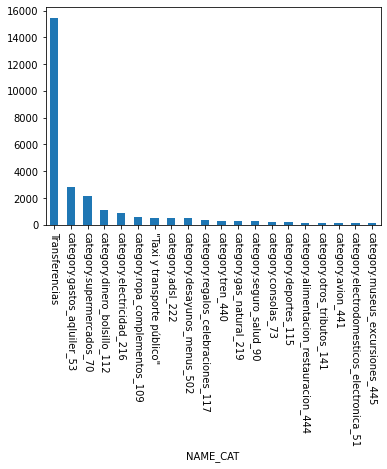

In [273]:
# grafico de barras con AMOUNT de transacciones que hay en Madrid por NAME_CAT
city_stats_nameCat_df['AMOUNT'].plot(kind="bar", rot=270)

In [276]:
"""
CONCLUSIONES:
Al igual que con CITY=Madrid
Vemos que en España la categoría en la que más gasta es 'Transferencias' con un gasto
15400 / 1340 = 11.5 veces superior a la media del gasto por categoria.
Probablemente esto sean gastos excepcionales por circunstancias especiales (outliers) que no podemos explicar
sólo con estos datos.

El gastos en el resto de categorías vemos que se acerca mucho más a la mean = 1330 eur y corresponden a gastos
del hogar como:
alquiler, supermercados, dinero-bolsillo, electricidad, ropa, transporte público.

CON TODOS LOS DATOS ANTERIORES PODEMOS CONCLUIR Q ESPAÑA ES EL DOMICILIO HABITUAL DEL CLIENTE

NO OBSTANTE ES MUY AVENTURADO OBTENER PATRONES DE COMPORTAMIENTO DEL CLIENTE CON TAN POCAS OBSERVACIONES Y CON 
DATOS ENTRE 2019 Y 2021 Y ADEMÁS JUSTO DURANTE LA PANDEMIA DEL COVID-19
"""

"\nCONCLUSIONES:\nAl igual que con CITY=Madrid\nVemos que en España la categoría en la que más gasta es 'Transferencias' con un gasto\n15400 / 1340 = 11.5 veces superior a la media del gasto por categoria.\nProbablemente esto sean gastos excepcionales por circunstancias especiales (outliers) que no podemos explicar\nsólo con estos datos.\n\nEl gastos en el resto de categorías vemos que se acerca mucho más a la mean = 1330 eur y corresponden a gastos\ndel hogar como:\nalquiler, supermercados, dinero-bolsillo, electricidad, ropa, transporte público.\n\nCON TODOS LOS DATOS ANTERIORES PODEMOS CONCLUIR Q ESPAÑA ES EL DOMICILIO HABITUAL DEL CLIENTE\n\nNO OBSTANTE ES MUY AVENTURADO OBTENER PATRONES DE COMPORTAMIENTO DEL CLIENTE CON TAN POCAS OBSERVACIONES Y CON \nDATOS ENTRE 2019 Y 2021 Y ADEMÁS JUSTO DURANTE LA PANDEMIA DEL COVID-19\n"

In [277]:
city_stats_nameCat_df['AMOUNT'].describe()

count       20.000000
mean      1341.711000
std       3399.448577
min         99.500000
25%        206.122500
50%        341.015000
75%        627.175000
max      15474.870000
Name: AMOUNT, dtype: float64

In [278]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['AMOUNT'])
stat_mode

1105.52

In [279]:
city_stats_df.groupby('COUNTRY').count().sort_values('DATE', ascending=False)

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,MONTH
COUNTRY,,,,,,
España,621,621,621,621,621,621
Perú,10,10,10,10,10,10
Alemania,3,3,3,3,3,3


In [280]:
# A continuación vamos a agrupar las transacciones de cada COUNTRY por MONTH y contarlas: Perú
pandas.set_option('display.max_rows', 20)
city_stats_df.loc[city_stats_df['COUNTRY'] == 'Perú'].groupby('MONTH').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
MONTH,,,,,,
5,1,1,1,1,1,1
6,1,1,1,1,1,1
7,2,2,2,2,2,2
8,1,1,1,1,1,1
9,2,2,2,2,2,2
10,1,1,1,1,1,1
11,1,1,1,1,1,1
12,1,1,1,1,1,1


In [281]:
# vemos la cantidad de transacciones que hay en Perú a lo largo de los 12 meses del año
city_stats_month_df = city_stats_df.loc[city_stats_df['COUNTRY'] == 'Perú'].groupby('MONTH').count()
city_stats_month_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
MONTH,,,,,,
5,1,1,1,1,1,1
6,1,1,1,1,1,1
7,2,2,2,2,2,2
8,1,1,1,1,1,1
9,2,2,2,2,2,2
10,1,1,1,1,1,1
11,1,1,1,1,1,1
12,1,1,1,1,1,1


<AxesSubplot:xlabel='MONTH'>

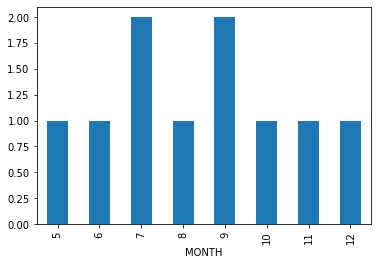

In [282]:
# grafico de barras con cantidad de transacciones que hay en Perú a lo largo de los 12 meses del año
city_stats_month_df['DATE'].plot(kind="bar")

In [ ]:
"""
CONCLUSIONES:
Al igual que con CITY='Lima',
Vemos que entre Mayo y Diciembre hay entre 1 y 2 movimientos mensuales.
A partir de estos datos no se puede concluir que el usuario haga viajes puntuales a Perú.
Más bien que hace 1 o 2 compras mensuales a un proveedor localizado en Perú.
"""

In [283]:
city_stats_month_df['DATE'].describe()

count    8.00000
mean     1.25000
std      0.46291
min      1.00000
25%      1.00000
50%      1.00000
75%      1.25000
max      2.00000
Name: DATE, dtype: float64

In [284]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['DATE'])
stat_mode

1

In [285]:
# A continuación vamos a contar las categorias en las que más transacciones hay para COUNTRY = Perú
pandas.set_option('display.max_rows', 50)
city_stats_nameCat_df = city_stats_df.loc[city_stats_df['COUNTRY'] == 'Perú'].groupby('NAME_CAT').\
count().sort_values('DATE', ascending=False)
city_stats_nameCat_df

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY,MONTH
NAME_CAT,,,,,,
category.desayunos_menus_502,10,10,10,10,10,10


In [286]:
# vamos a quedarnos con las 20 categorias que más observaciones tienen
city_stats_nameCat_df = city_stats_nameCat_df.iloc[:20, :]
city_stats_nameCat_df

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY,MONTH
NAME_CAT,,,,,,
category.desayunos_menus_502,10,10,10,10,10,10


<AxesSubplot:xlabel='NAME_CAT'>

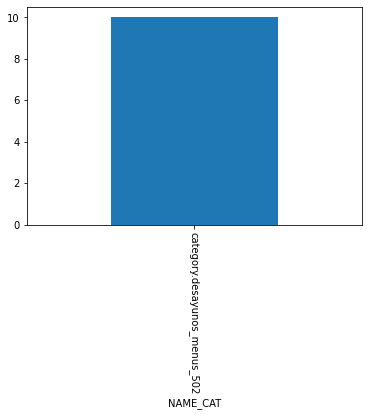

In [287]:
# grafico de barras con cantidad de transacciones que hay en Perú
city_stats_nameCat_df['DATE'].plot(kind="bar", rot=270)

In [288]:
"""
CONCLUSIONES:
Al igual que con CITY='Lima'
Vemos que todas las transacciones corresponden a la categoria de desayunos_menus.
Luego quiza podamos concluir que 1 vez al mes al usuario le pasan un recibo por un desyuno/comida en un 
establecimiento con domicilio fiscal en Lima; o que alguien en Lima come/desayuna una vez al mes y pasa el
recibo a la cuenta de este usuario.
"""

"\nCONCLUSIONES:\nAl igual que con CITY='Lima'\nVemos que todas las transacciones corresponden a la categoria de desayunos_menus.\nLuego quiza podamos concluir que 1 vez al mes al usuario le pasan un recibo por un desyuno/comida en un \nestablecimiento con domicilio fiscal en Lima; o que alguien en Lima come/desayuna una vez al mes y pasa el\nrecibo a la cuenta de este usuario.\n"

In [289]:
city_stats_nameCat_df['DATE'].describe()

count     1.0
mean     10.0
std       NaN
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: DATE, dtype: float64

In [290]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_nameCat_df['DATE'])
stat_mode

10

In [291]:
# vemos cuanto suman cada mes las transacciones que hay en Perú a lo largo de los 12 meses del año
city_stats_month_df = city_stats_df.loc[city_stats_df['COUNTRY'] == 'Perú'].groupby('MONTH').sum()
city_stats_month_df

,AMOUNT,ID_CAT
MONTH,,
5,-3.95,502.0
6,-7.90,502.0
7,-22.40,1004.0
8,-7.00,502.0
9,-17.78,1004.0
10,-14.00,502.0
11,-12.90,502.0
12,-5.00,502.0


In [292]:
city_stats_month_df.drop(columns=['ID_CAT'], inplace=True)
city_stats_month_df

,AMOUNT
MONTH,
5,-3.95
6,-7.90
7,-22.40
8,-7.00
9,-17.78
10,-14.00
11,-12.90
12,-5.00


In [293]:
# multiplicamos los valores de AMOUNT por -1 para mayor comodidad de trabajo
city_stats_month_df = -city_stats_month_df
city_stats_month_df

,AMOUNT
MONTH,
5,3.95
6,7.90
7,22.40
8,7.00
9,17.78
10,14.00
11,12.90
12,5.00


<AxesSubplot:xlabel='MONTH'>

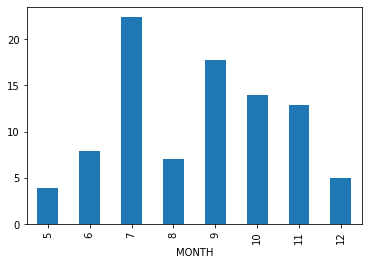

In [294]:
# grafico de barras con dinero gastado en Perú a lo largo de los 12 meses del año
city_stats_month_df['AMOUNT'].plot(kind="bar")

In [299]:
"""
CONCLUSIONES:
Al igual que con CITY='Lima'
mean = 11 eur y 50% = 10 eur y 25% = 6.5 eur y 75% = 15 eur.
Por tanto podemos concluir que entre mayo y diciembre, 1 vez al mes, alguien toma una comida en Perú o en un 
restaurante que hace un cargo desde una cuenta en Perú y lo carga a la cuenta del usuario.
"""

"\nCONCLUSIONES:\nAl igual que con CITY='Lima'\nmean = 11 eur y 50% = 10 eur y 25% = 6.5 eur y 75% = 15 eur.\nPor tanto podemos concluir que entre mayo y diciembre, 1 vez al mes, alguien toma una comida en Perú o en un \nrestaurante que hace un cargo desde una cuenta en Perú y lo carga a la cuenta del usuario.\n"

In [298]:
city_stats_month_df['AMOUNT'].describe()

count     8.000000
mean     11.366250
std       6.533188
min       3.950000
25%       6.500000
50%      10.400000
75%      14.945000
max      22.400000
Name: AMOUNT, dtype: float64

In [300]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['AMOUNT'])
stat_mode

3.95

In [301]:
# A continuación vamos a calcular cuanto gasta en cada categoria para COUNTRY = Perú
pandas.set_option('display.max_rows', 50)
city_stats_nameCat_df = city_stats_df.loc[city_stats_df['COUNTRY'] == 'Perú'].groupby('NAME_CAT').\
sum().sort_values('AMOUNT', ascending=True)
city_stats_nameCat_df

,AMOUNT,ID_CAT,MONTH
NAME_CAT,,,
category.desayunos_menus_502,-90.93,5020.0,84


In [302]:
# vamos a quedarnos con las 20 categorias que más gasto acumulan
city_stats_nameCat_df = city_stats_nameCat_df.iloc[:20, :]
city_stats_nameCat_df

,AMOUNT,ID_CAT,MONTH
NAME_CAT,,,
category.desayunos_menus_502,-90.93,5020.0,84


In [303]:
city_stats_nameCat_df.drop(columns=['ID_CAT', 'MONTH'], inplace=True)
city_stats_nameCat_df

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,AMOUNT
NAME_CAT,
category.desayunos_menus_502,-90.93


In [304]:
# multiplicamos los valores de AMOUNT por -1 para mayor comodidad de trabajo
city_stats_nameCat_df = -city_stats_nameCat_df
city_stats_nameCat_df

,AMOUNT
NAME_CAT,
category.desayunos_menus_502,90.93


<AxesSubplot:xlabel='NAME_CAT'>

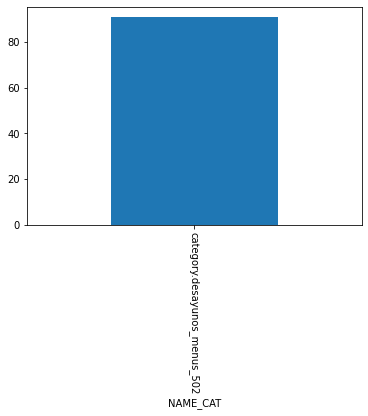

In [305]:
# grafico de barras con AMOUNT de transacciones que hay en Perú por NAME_CAT
city_stats_nameCat_df['AMOUNT'].plot(kind="bar", rot=270)

In [306]:
"""
Al igual que con CITY='Lima'
Vemos que el total acumulado de gasto en desayunos/menus en Perú es de 90 eur.

CON TODOS LOS DATOS ANTERIORES PODEMOS CONCLUIR QUE EL USUARIO ENTRE MAYO Y DICIEMBRE 1 VEZ AL MES DESAYUNA/COME
EN PERU O EN UN RESTAURANTE QUE PASA EL RECIBO DESDE UNA CUENTA BANCARIA EN PERU.
"""

"\nAl igual que con CITY='Lima'\nVemos que el total acumulado de gasto en desayunos/menus en Perú es de 90 eur.\n\nCON TODOS LOS DATOS ANTERIORES PODEMOS CONCLUIR QUE EL USUARIO ENTRE MAYO Y DICIEMBRE 1 VEZ AL MES DESAYUNA/COME\nEN PERU O EN UN RESTAURANTE QUE PASA EL RECIBO DESDE UNA CUENTA BANCARIA EN PERU.\n"

In [307]:
city_stats_nameCat_df['AMOUNT'].describe()

count     1.00
mean     90.93
std        NaN
min      90.93
25%      90.93
50%      90.93
75%      90.93
max      90.93
Name: AMOUNT, dtype: float64

In [308]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['AMOUNT'])
stat_mode

3.95

In [310]:
city_stats_df.groupby('COUNTRY').count().sort_values('DATE', ascending=False)

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,MONTH
COUNTRY,,,,,,
España,621,621,621,621,621,621
Perú,10,10,10,10,10,10
Alemania,3,3,3,3,3,3


In [311]:
# A continuación vamos a agrupar las transacciones de cada COUNTRY por MONTH y contarlas. Empezamos con Alemania.
pandas.set_option('display.max_rows', 20)
city_stats_df.loc[city_stats_df['COUNTRY'] == 'Alemania'].groupby('MONTH').count()

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
MONTH,,,,,,
6,2,2,2,2,2,2
11,1,1,1,1,1,1


In [313]:
# vemos la cantidad de transacciones que hay en Alemania a lo largo de los 12 meses del año
city_stats_month_df = city_stats_df.loc[city_stats_df['COUNTRY'] == 'Alemania'].groupby('MONTH').count()
city_stats_month_df

,DATE,AMOUNT,ID_CAT,NAME_CAT,CITY,COUNTRY
MONTH,,,,,,
6,2,2,2,2,2,2
11,1,1,1,1,1,1


<AxesSubplot:xlabel='MONTH'>

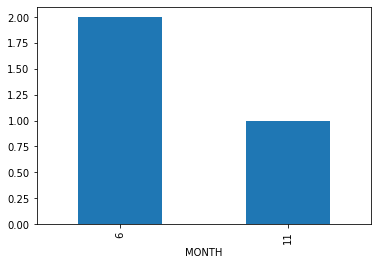

In [314]:
# grafico de barras con cantidad de transacciones que hay en Alemania a lo largo de los 12 meses del año
city_stats_month_df['DATE'].plot(kind="bar")

In [315]:
"""
CONCLUSIONES:
Al igual que con CITY='Berlin'
Vemos que hay dos transacciones en junio y una noviembre.
Con tan pocas observaciones es muy aventurado intentar sacar patrones de comportamiento del usuario.
Quizá podemos decir que esas observaciones corresponden a gastos personales realizados por el usuario en viajes de
empresa a Alemania.
"""

"\nCONCLUSIONES:\nAl igual que con CITY='Berlin'\nVemos que hay dos transacciones en junio y una noviembre.\nCon tan pocas observaciones es muy aventurado intentar sacar patrones de comportamiento del usuario.\nQuizá podemos decir que esas observaciones corresponden a gastos personales realizados por el usuario en viajes de\nempresa a Alemania.\n"

In [316]:
city_stats_month_df['DATE'].describe()

count    2.000000
mean     1.500000
std      0.707107
min      1.000000
25%      1.250000
50%      1.500000
75%      1.750000
max      2.000000
Name: DATE, dtype: float64

In [317]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['DATE'])
stat_mode

2

In [318]:
# A continuación vamos a contar las categorias en las que más transacciones hay para COUNTRY = Alemania
pandas.set_option('display.max_rows', 50)
city_stats_nameCat_df = city_stats_df.loc[city_stats_df['COUNTRY'] == 'Alemania'].groupby('NAME_CAT').\
count().sort_values('DATE', ascending=False)
city_stats_nameCat_df

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY,MONTH
NAME_CAT,,,,,,
category.otros_449,2,2,2,2,2,2
category.otros_tributos_141,1,1,1,1,1,1


In [319]:
# vamos a quedarnos con las 20 categorias que más observaciones tienen
city_stats_nameCat_df = city_stats_nameCat_df.iloc[:20, :]
city_stats_nameCat_df

,DATE,AMOUNT,ID_CAT,CITY,COUNTRY,MONTH
NAME_CAT,,,,,,
category.otros_449,2,2,2,2,2,2
category.otros_tributos_141,1,1,1,1,1,1


<AxesSubplot:xlabel='NAME_CAT'>

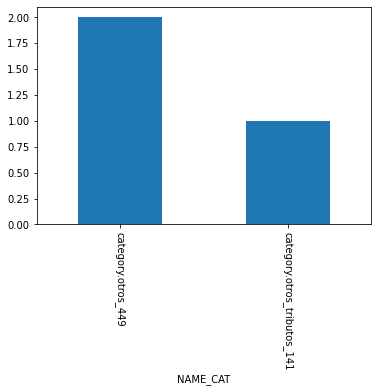

In [320]:
# grafico de barras con cantidad de transacciones que hay en Alemania
city_stats_nameCat_df['DATE'].plot(kind="bar", rot=270)

In [321]:
"""
CONCLUSIONES:
Al igual que con CITY='Berlin'
Vemos que hay dos transacciones que correponden a otros_449 y otra que corresponde a tributos_449.
No podemos hacer predicciones ni encontrar patrones de comportamiento en el usuario con 3 observaciones que
además están asociadas a categoría con nombres tan genéricos.
Quizá podríamos decir que estas transacciones correspondan a compras online a una empresa con sede social/fiscal
en Alemania.
"""

"\nCONCLUSIONES:\nAl igual que con CITY='Berlin'\nVemos que hay dos transacciones que correponden a otros_449 y otra que corresponde a tributos_449.\nNo podemos hacer predicciones ni encontrar patrones de comportamiento en el usuario con 3 observaciones que\nademás están asociadas a categoría con nombres tan genéricos.\nQuizá podríamos decir que estas transacciones correspondan a compras online a una empresa con sede social/fiscal\nen Alemania.\n"

In [322]:
city_stats_nameCat_df['DATE'].describe()

count    2.000000
mean     1.500000
std      0.707107
min      1.000000
25%      1.250000
50%      1.500000
75%      1.750000
max      2.000000
Name: DATE, dtype: float64

In [323]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_nameCat_df['DATE'])
stat_mode

2

In [324]:
# vemos cuanto suman cada mes las transacciones que hay en Alemania a lo largo de los 12 meses del año
city_stats_month_df = city_stats_df.loc[city_stats_df['COUNTRY'] == 'Alemania'].groupby('MONTH').sum()
city_stats_month_df

,AMOUNT,ID_CAT
MONTH,,
6,-50.74,898.0
11,-10.00,141.0


In [325]:
city_stats_month_df.drop(columns=['ID_CAT'], inplace=True)
city_stats_month_df

,AMOUNT
MONTH,
6,-50.74
11,-10.00


In [326]:
# multiplicamos los valores de AMOUNT por -1 para mayor comodidad de trabajo
city_stats_month_df = -city_stats_month_df
city_stats_month_df

,AMOUNT
MONTH,
6,50.74
11,10.00


<AxesSubplot:xlabel='MONTH'>

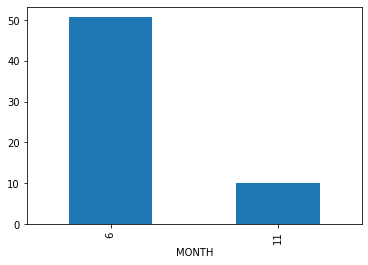

In [327]:
# grafico de barras con dinero gastado en Alemania a lo largo de los 12 meses del año
city_stats_month_df['AMOUNT'].plot(kind="bar")

In [ ]:
"""
CONCLUSIONES:
Al igual que con CITY='Berlin'
Vemos que en julio el usuario en Alemania acumula gastos por valor de 50 eur y en noviembre por 10 eur.

En linea con la asuncion hecha en la conclusiones anteriores podríamos aventurarnos a decir en junio el usuario
hizo comprar onine por valor 50 eur a un proveedor con domicilio fiscal/social en Alemania y en noviembre le
pasaron 10 eur en impuestos por dichas compras (quiza un IVA de un 20%).
"""

In [328]:
city_stats_month_df['AMOUNT'].describe()

count     2.00000
mean     30.37000
std      28.80753
min      10.00000
25%      20.18500
50%      30.37000
75%      40.55500
max      50.74000
Name: AMOUNT, dtype: float64

In [329]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['AMOUNT'])
stat_mode

50.74

In [330]:
# A continuación vamos a calcular cuanto gasta en cada categoria para COUNTRY = Alemania
pandas.set_option('display.max_rows', 50)
city_stats_nameCat_df = city_stats_df.loc[city_stats_df['COUNTRY'] == 'Alemania'].groupby('NAME_CAT').\
sum().sort_values('AMOUNT', ascending=True)
city_stats_nameCat_df

,AMOUNT,ID_CAT,MONTH
NAME_CAT,,,
category.otros_449,-50.74,898.0,12
category.otros_tributos_141,-10.00,141.0,11


In [331]:
# vamos a quedarnos con las 20 categorias que más gasto acumulan
city_stats_nameCat_df = city_stats_nameCat_df.iloc[:20, :]
city_stats_nameCat_df

,AMOUNT,ID_CAT,MONTH
NAME_CAT,,,
category.otros_449,-50.74,898.0,12
category.otros_tributos_141,-10.00,141.0,11


In [332]:
city_stats_nameCat_df.drop(columns=['ID_CAT', 'MONTH'], inplace=True)
city_stats_nameCat_df

/home/pedro/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,AMOUNT
NAME_CAT,
category.otros_449,-50.74
category.otros_tributos_141,-10.00


In [333]:
# multiplicamos los valores de AMOUNT por -1 para mayor comodidad de trabajo
city_stats_nameCat_df = -city_stats_nameCat_df
city_stats_nameCat_df

,AMOUNT
NAME_CAT,
category.otros_449,50.74
category.otros_tributos_141,10.00


<AxesSubplot:xlabel='NAME_CAT'>

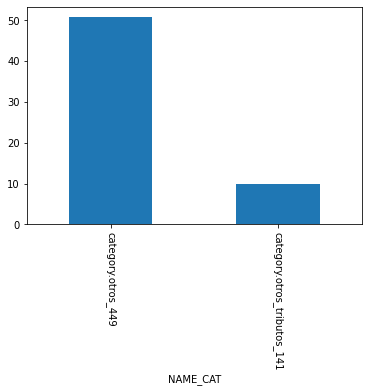

In [334]:
# grafico de barras con AMOUNT de transacciones que hay en Alemania por NAME_CAT
city_stats_nameCat_df['AMOUNT'].plot(kind="bar", rot=270)

In [ ]:
"""
CONCLUSIONES:
Al igual que con CITY='Berlin'
Nos reiteramos en nuestra asunción: en junio hizo dos compras por valor de 25 eur a un proveedor con sede 
social/fiscal en Alemania y en noviembre le pasarón los impuestos por un valor de 10 eur que corresponden al
20% (IVA?) del valor de dichas compras.
"""

In [335]:
city_stats_nameCat_df['AMOUNT'].describe()

count     2.00000
mean     30.37000
std      28.80753
min      10.00000
25%      20.18500
50%      30.37000
75%      40.55500
max      50.74000
Name: AMOUNT, dtype: float64

In [336]:
# calculamos la moda
stat_mode = statistics.mode(city_stats_month_df['AMOUNT'])
stat_mode

50.74

In [248]:
"""
POR AQUI TE QUEDAS:
el miercoles mandas mail con conclusiones a dani, andres, cc alejando, samu, alba
y haces pull de branch alejandro para q coja datos como json y luego en gitlan dejas el excel y el ipynb
en un directorio ad hoc y explicas en mail q no se puede integrar ni poner en pycharam pq la limpieza de datos
ha tenido que ser a medida.
Y CON ESO CIERRAS FINLEAP EL JUEVES LO PRESENTAS A ANDRES Y EL VIERNES DEVUELVES EL PORTATIL
"""

"\n***POR AQUI TE QUEDAS PARA HACER HACER EL MISMO ESTUDIO DE CIUDADES CON PAISES Y CON ESO HAS TERMINADO PARA FINLEAP\n***LA RECETA PARA HACERLO LA TIENES EN EL SUBLIME EN '20210216 TAREAS.TXT'\nCON ESO TERMINAS EL MARTES Y EL MIERCOLES MANDAS UN MAIL Y LO SUBES AL GITLAB IPYNB Y EXCEL Y CIERRAS CON FINLEAP\n"